# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [4]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

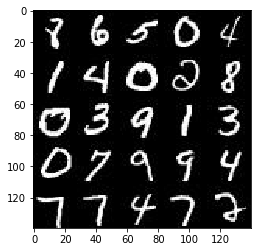

In [5]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

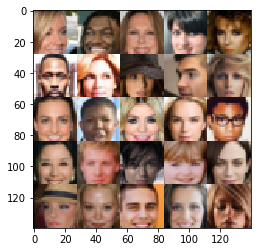

In [6]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/shahzadsalim/anaconda3/envs/dog-project/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [8]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    
    return inputs_real, inputs_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [89]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha=0.1
    init = tf.random_normal_initializer(stddev=0.02)


    with tf.variable_scope('discriminator', reuse=reuse):
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, kernel_initializer=init, padding="same")
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, 0.9)


        #print("discriminator 1")

        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, kernel_initializer=init, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, 0.9)

        
        #print("discriminator 2")
       

        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, kernel_initializer=init, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, 0.9)


        #print("discriminator 3")

        x = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)

        #print("discriminator 4")

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [90]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha=0.1
    init = tf.random_normal_initializer(stddev=0.02)

    with tf.variable_scope('generator', reuse=not is_train):
        #print("generator 1")

        x = tf.layers.dense(z, 7*7*512)
        
        x = tf.reshape(x, (-1,7, 7, 512))
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
        x = tf.nn.dropout(x, 0.5)

        

        
        x = tf.layers.conv2d_transpose(x, 256, 5, strides=2, kernel_initializer=init, padding="same")
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
        x = tf.nn.dropout(x, 0.5)

        #print("generator 2")

        
        x = tf.layers.conv2d_transpose(x, 128, 5, strides=2, kernel_initializer=init, padding="same")
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
        x = tf.nn.dropout(x, 0.5)

        #print("generator 3")

        
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 5, strides=1, kernel_initializer=init, padding="same")
        #print("generator 4")

       
        out = tf.tanh(logits)
        
        
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [91]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    #print("modeloss_1")

    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    #print("modeloss_2")

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    #print("modeloss_3")

    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    #print("modeloss_4")

    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    #print("modeloss_5")

    
    
    return d_loss, g_loss
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [92]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    #print("modelot_1")
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]
    #print("modelot_2")

    
    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss, var_list=d_vars)
        #print("modelot_3")

    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
        #print("modelot_4")

    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [93]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [94]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    images_count, image_width, image_height, image_channels = data_shape

    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z})
                #print("here 2")

                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.8815... Generator Loss: 14.3344
Epoch 1/2... Discriminator Loss: 5.8279... Generator Loss: 21.1232
Epoch 1/2... Discriminator Loss: 1.0319... Generator Loss: 0.8764
Epoch 1/2... Discriminator Loss: 0.6559... Generator Loss: 1.9879
Epoch 1/2... Discriminator Loss: 0.8618... Generator Loss: 1.4898
Epoch 1/2... Discriminator Loss: 1.0149... Generator Loss: 1.2283
Epoch 1/2... Discriminator Loss: 1.6653... Generator Loss: 0.4387
Epoch 1/2... Discriminator Loss: 1.5407... Generator Loss: 0.9090
Epoch 1/2... Discriminator Loss: 1.2555... Generator Loss: 1.5413
Epoch 1/2... Discriminator Loss: 0.8288... Generator Loss: 1.6348


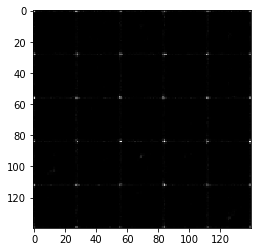

Epoch 1/2... Discriminator Loss: 1.3456... Generator Loss: 1.1054
Epoch 1/2... Discriminator Loss: 0.9999... Generator Loss: 1.1097
Epoch 1/2... Discriminator Loss: 1.4176... Generator Loss: 0.7061
Epoch 1/2... Discriminator Loss: 1.6351... Generator Loss: 0.4057
Epoch 1/2... Discriminator Loss: 1.4140... Generator Loss: 0.4936
Epoch 1/2... Discriminator Loss: 1.4806... Generator Loss: 1.7957
Epoch 1/2... Discriminator Loss: 0.8837... Generator Loss: 1.3406
Epoch 1/2... Discriminator Loss: 1.2314... Generator Loss: 0.7625
Epoch 1/2... Discriminator Loss: 1.1826... Generator Loss: 0.7209
Epoch 1/2... Discriminator Loss: 1.0670... Generator Loss: 0.7224


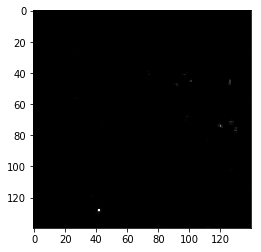

Epoch 1/2... Discriminator Loss: 1.5087... Generator Loss: 0.3950
Epoch 1/2... Discriminator Loss: 1.1188... Generator Loss: 0.9075
Epoch 1/2... Discriminator Loss: 1.6878... Generator Loss: 0.4655
Epoch 1/2... Discriminator Loss: 1.1704... Generator Loss: 0.6407
Epoch 1/2... Discriminator Loss: 1.3280... Generator Loss: 0.9967
Epoch 1/2... Discriminator Loss: 1.2990... Generator Loss: 0.7136
Epoch 1/2... Discriminator Loss: 0.9528... Generator Loss: 1.0825
Epoch 1/2... Discriminator Loss: 1.4298... Generator Loss: 0.5383
Epoch 1/2... Discriminator Loss: 1.5791... Generator Loss: 0.3994
Epoch 1/2... Discriminator Loss: 1.2739... Generator Loss: 1.6619


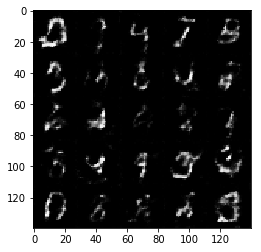

Epoch 1/2... Discriminator Loss: 1.1035... Generator Loss: 1.7014
Epoch 1/2... Discriminator Loss: 0.9301... Generator Loss: 1.5384
Epoch 1/2... Discriminator Loss: 1.6512... Generator Loss: 0.4498
Epoch 1/2... Discriminator Loss: 1.5085... Generator Loss: 1.9297
Epoch 1/2... Discriminator Loss: 1.3201... Generator Loss: 0.6483
Epoch 1/2... Discriminator Loss: 1.5825... Generator Loss: 0.4157
Epoch 1/2... Discriminator Loss: 1.5858... Generator Loss: 0.3881
Epoch 1/2... Discriminator Loss: 1.3001... Generator Loss: 0.5618
Epoch 1/2... Discriminator Loss: 1.0388... Generator Loss: 1.0321
Epoch 1/2... Discriminator Loss: 1.1289... Generator Loss: 0.9003


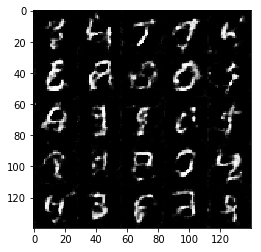

Epoch 1/2... Discriminator Loss: 1.2403... Generator Loss: 1.2515
Epoch 1/2... Discriminator Loss: 1.4356... Generator Loss: 0.4776
Epoch 1/2... Discriminator Loss: 1.1077... Generator Loss: 1.6500
Epoch 1/2... Discriminator Loss: 1.0231... Generator Loss: 1.5167
Epoch 1/2... Discriminator Loss: 1.0600... Generator Loss: 1.2371
Epoch 1/2... Discriminator Loss: 1.0538... Generator Loss: 1.3279
Epoch 1/2... Discriminator Loss: 1.0440... Generator Loss: 1.2711
Epoch 1/2... Discriminator Loss: 1.5796... Generator Loss: 1.9097
Epoch 1/2... Discriminator Loss: 1.0821... Generator Loss: 1.3618
Epoch 1/2... Discriminator Loss: 1.3803... Generator Loss: 0.6795


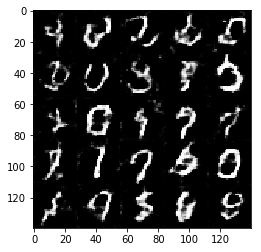

Epoch 1/2... Discriminator Loss: 1.3044... Generator Loss: 1.6911
Epoch 1/2... Discriminator Loss: 1.2333... Generator Loss: 2.0570
Epoch 1/2... Discriminator Loss: 1.0241... Generator Loss: 1.2429
Epoch 1/2... Discriminator Loss: 1.0544... Generator Loss: 0.9639
Epoch 1/2... Discriminator Loss: 1.3563... Generator Loss: 2.1771
Epoch 1/2... Discriminator Loss: 1.3155... Generator Loss: 0.7438
Epoch 1/2... Discriminator Loss: 1.0803... Generator Loss: 1.5964
Epoch 1/2... Discriminator Loss: 1.0326... Generator Loss: 1.7592
Epoch 1/2... Discriminator Loss: 1.1108... Generator Loss: 1.3955
Epoch 1/2... Discriminator Loss: 1.5311... Generator Loss: 0.5545


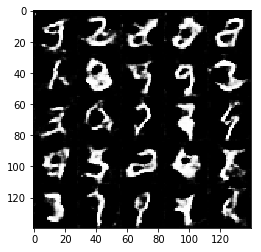

Epoch 1/2... Discriminator Loss: 1.0981... Generator Loss: 1.5189
Epoch 1/2... Discriminator Loss: 1.2840... Generator Loss: 1.7118
Epoch 1/2... Discriminator Loss: 1.3451... Generator Loss: 2.5990
Epoch 1/2... Discriminator Loss: 1.0461... Generator Loss: 1.3935
Epoch 1/2... Discriminator Loss: 1.5180... Generator Loss: 0.4903
Epoch 1/2... Discriminator Loss: 1.0724... Generator Loss: 1.0819
Epoch 1/2... Discriminator Loss: 0.9853... Generator Loss: 1.2135
Epoch 1/2... Discriminator Loss: 1.0939... Generator Loss: 1.5210
Epoch 1/2... Discriminator Loss: 1.1273... Generator Loss: 0.7433
Epoch 1/2... Discriminator Loss: 1.0444... Generator Loss: 1.2693


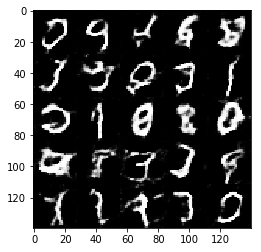

Epoch 1/2... Discriminator Loss: 1.1227... Generator Loss: 2.1237
Epoch 1/2... Discriminator Loss: 1.3613... Generator Loss: 0.6411
Epoch 1/2... Discriminator Loss: 1.0383... Generator Loss: 0.9195
Epoch 1/2... Discriminator Loss: 1.2162... Generator Loss: 2.2339
Epoch 1/2... Discriminator Loss: 0.9918... Generator Loss: 1.8301
Epoch 1/2... Discriminator Loss: 1.4895... Generator Loss: 2.6947
Epoch 1/2... Discriminator Loss: 1.5045... Generator Loss: 0.4813
Epoch 1/2... Discriminator Loss: 1.1227... Generator Loss: 0.7265
Epoch 1/2... Discriminator Loss: 1.0049... Generator Loss: 1.0918
Epoch 1/2... Discriminator Loss: 1.3840... Generator Loss: 0.5211


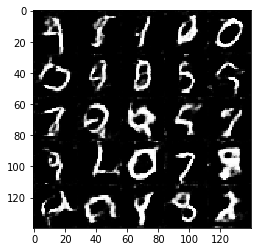

Epoch 1/2... Discriminator Loss: 1.2471... Generator Loss: 0.5198
Epoch 1/2... Discriminator Loss: 1.5020... Generator Loss: 0.4223
Epoch 1/2... Discriminator Loss: 0.9798... Generator Loss: 0.7644
Epoch 1/2... Discriminator Loss: 1.1796... Generator Loss: 1.9806
Epoch 1/2... Discriminator Loss: 1.2677... Generator Loss: 2.2857
Epoch 1/2... Discriminator Loss: 1.0186... Generator Loss: 1.1772
Epoch 1/2... Discriminator Loss: 0.8183... Generator Loss: 1.6566
Epoch 1/2... Discriminator Loss: 1.2625... Generator Loss: 3.0433
Epoch 1/2... Discriminator Loss: 1.2696... Generator Loss: 0.6513
Epoch 1/2... Discriminator Loss: 1.1208... Generator Loss: 1.2512


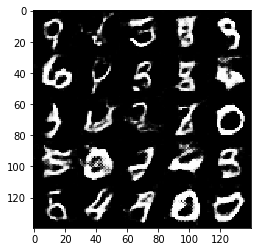

Epoch 1/2... Discriminator Loss: 0.7147... Generator Loss: 1.8755
Epoch 1/2... Discriminator Loss: 1.0002... Generator Loss: 2.6040
Epoch 1/2... Discriminator Loss: 0.9663... Generator Loss: 0.9968
Epoch 1/2... Discriminator Loss: 0.8830... Generator Loss: 1.4176
Epoch 1/2... Discriminator Loss: 0.8670... Generator Loss: 1.1770
Epoch 1/2... Discriminator Loss: 1.0271... Generator Loss: 1.1140
Epoch 1/2... Discriminator Loss: 1.1622... Generator Loss: 0.9328
Epoch 1/2... Discriminator Loss: 1.0944... Generator Loss: 0.9022
Epoch 1/2... Discriminator Loss: 1.0231... Generator Loss: 1.0401
Epoch 1/2... Discriminator Loss: 1.1808... Generator Loss: 0.7356


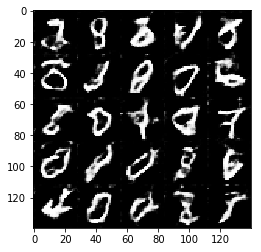

Epoch 1/2... Discriminator Loss: 0.9605... Generator Loss: 1.4699
Epoch 1/2... Discriminator Loss: 0.8300... Generator Loss: 1.8699
Epoch 1/2... Discriminator Loss: 0.7779... Generator Loss: 2.0599
Epoch 1/2... Discriminator Loss: 1.0510... Generator Loss: 0.8684
Epoch 1/2... Discriminator Loss: 0.7906... Generator Loss: 1.5566
Epoch 1/2... Discriminator Loss: 0.9201... Generator Loss: 1.0746
Epoch 1/2... Discriminator Loss: 0.6357... Generator Loss: 1.9268
Epoch 1/2... Discriminator Loss: 0.7263... Generator Loss: 2.0122
Epoch 1/2... Discriminator Loss: 0.9560... Generator Loss: 1.0938
Epoch 1/2... Discriminator Loss: 1.2906... Generator Loss: 0.6537


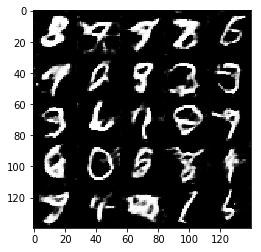

Epoch 1/2... Discriminator Loss: 1.2374... Generator Loss: 0.6666
Epoch 1/2... Discriminator Loss: 0.8306... Generator Loss: 2.4124
Epoch 1/2... Discriminator Loss: 0.7220... Generator Loss: 1.4892
Epoch 1/2... Discriminator Loss: 1.0641... Generator Loss: 1.1068
Epoch 1/2... Discriminator Loss: 0.8707... Generator Loss: 1.4371
Epoch 1/2... Discriminator Loss: 1.1517... Generator Loss: 0.7887
Epoch 1/2... Discriminator Loss: 1.0251... Generator Loss: 2.5207
Epoch 1/2... Discriminator Loss: 0.9645... Generator Loss: 1.2459
Epoch 1/2... Discriminator Loss: 1.1122... Generator Loss: 0.8215
Epoch 1/2... Discriminator Loss: 1.1604... Generator Loss: 0.7748


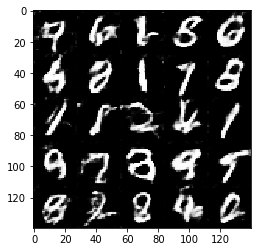

Epoch 1/2... Discriminator Loss: 0.7984... Generator Loss: 1.2043
Epoch 1/2... Discriminator Loss: 1.0951... Generator Loss: 3.5502
Epoch 1/2... Discriminator Loss: 1.1639... Generator Loss: 2.5740
Epoch 1/2... Discriminator Loss: 0.9394... Generator Loss: 1.0066
Epoch 1/2... Discriminator Loss: 0.6661... Generator Loss: 1.7602
Epoch 1/2... Discriminator Loss: 0.9048... Generator Loss: 1.6450
Epoch 1/2... Discriminator Loss: 0.8318... Generator Loss: 1.1391
Epoch 1/2... Discriminator Loss: 1.8733... Generator Loss: 4.6249
Epoch 1/2... Discriminator Loss: 0.9594... Generator Loss: 1.1249
Epoch 1/2... Discriminator Loss: 1.1543... Generator Loss: 3.1733


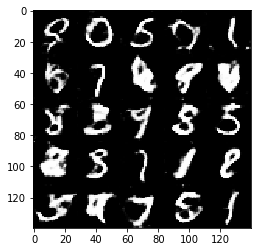

Epoch 1/2... Discriminator Loss: 1.3579... Generator Loss: 0.7243
Epoch 1/2... Discriminator Loss: 1.1342... Generator Loss: 2.3653
Epoch 1/2... Discriminator Loss: 1.0062... Generator Loss: 0.8691
Epoch 1/2... Discriminator Loss: 0.9451... Generator Loss: 2.3785
Epoch 1/2... Discriminator Loss: 0.9421... Generator Loss: 1.9660
Epoch 1/2... Discriminator Loss: 0.7488... Generator Loss: 1.1963
Epoch 1/2... Discriminator Loss: 0.9953... Generator Loss: 1.7113
Epoch 1/2... Discriminator Loss: 1.2354... Generator Loss: 0.8676
Epoch 1/2... Discriminator Loss: 1.5136... Generator Loss: 0.6621
Epoch 1/2... Discriminator Loss: 0.7015... Generator Loss: 1.5670


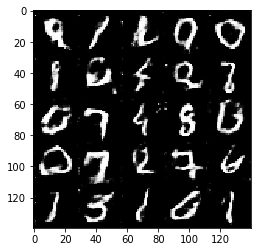

Epoch 1/2... Discriminator Loss: 0.7842... Generator Loss: 1.3213
Epoch 1/2... Discriminator Loss: 1.2494... Generator Loss: 0.6024
Epoch 1/2... Discriminator Loss: 0.8390... Generator Loss: 1.5040
Epoch 1/2... Discriminator Loss: 0.7420... Generator Loss: 1.4872
Epoch 1/2... Discriminator Loss: 1.0115... Generator Loss: 1.0390
Epoch 1/2... Discriminator Loss: 0.7226... Generator Loss: 2.1791
Epoch 1/2... Discriminator Loss: 1.1893... Generator Loss: 0.9571
Epoch 1/2... Discriminator Loss: 0.9121... Generator Loss: 1.9258
Epoch 1/2... Discriminator Loss: 0.9796... Generator Loss: 1.1437
Epoch 1/2... Discriminator Loss: 1.0452... Generator Loss: 1.2060


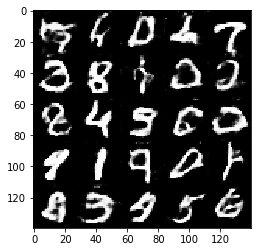

Epoch 1/2... Discriminator Loss: 0.8525... Generator Loss: 1.2634
Epoch 1/2... Discriminator Loss: 0.7054... Generator Loss: 2.1768
Epoch 1/2... Discriminator Loss: 0.9370... Generator Loss: 1.6518
Epoch 1/2... Discriminator Loss: 0.6483... Generator Loss: 1.7784
Epoch 1/2... Discriminator Loss: 0.8051... Generator Loss: 1.6146
Epoch 1/2... Discriminator Loss: 0.8190... Generator Loss: 2.4973
Epoch 1/2... Discriminator Loss: 0.8607... Generator Loss: 1.7362
Epoch 1/2... Discriminator Loss: 1.2496... Generator Loss: 0.7415
Epoch 1/2... Discriminator Loss: 1.2943... Generator Loss: 0.7740
Epoch 1/2... Discriminator Loss: 1.0397... Generator Loss: 1.2062


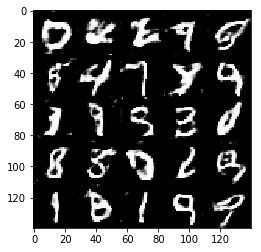

Epoch 1/2... Discriminator Loss: 0.8572... Generator Loss: 1.0931
Epoch 1/2... Discriminator Loss: 1.1079... Generator Loss: 0.9212
Epoch 1/2... Discriminator Loss: 0.9529... Generator Loss: 1.0245
Epoch 1/2... Discriminator Loss: 0.9243... Generator Loss: 2.3462
Epoch 1/2... Discriminator Loss: 0.6685... Generator Loss: 1.6935
Epoch 1/2... Discriminator Loss: 0.6343... Generator Loss: 2.0400
Epoch 1/2... Discriminator Loss: 0.7171... Generator Loss: 1.4267
Epoch 1/2... Discriminator Loss: 0.5829... Generator Loss: 2.1923
Epoch 1/2... Discriminator Loss: 0.6958... Generator Loss: 2.6782
Epoch 1/2... Discriminator Loss: 0.7025... Generator Loss: 2.1984


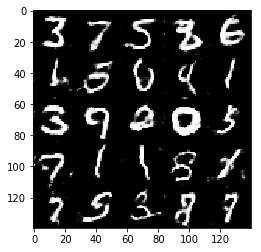

Epoch 1/2... Discriminator Loss: 1.0952... Generator Loss: 1.0017
Epoch 1/2... Discriminator Loss: 0.8161... Generator Loss: 1.4053
Epoch 1/2... Discriminator Loss: 0.9820... Generator Loss: 2.5917
Epoch 1/2... Discriminator Loss: 0.8085... Generator Loss: 1.9637
Epoch 1/2... Discriminator Loss: 0.7922... Generator Loss: 2.1395
Epoch 1/2... Discriminator Loss: 0.8170... Generator Loss: 1.2569
Epoch 1/2... Discriminator Loss: 0.5286... Generator Loss: 2.4292
Epoch 1/2... Discriminator Loss: 0.6183... Generator Loss: 2.1353
Epoch 1/2... Discriminator Loss: 0.7940... Generator Loss: 1.5531
Epoch 1/2... Discriminator Loss: 0.7949... Generator Loss: 1.7963


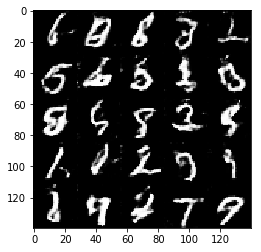

Epoch 1/2... Discriminator Loss: 1.2387... Generator Loss: 0.8171
Epoch 1/2... Discriminator Loss: 1.2137... Generator Loss: 0.7861
Epoch 1/2... Discriminator Loss: 0.9961... Generator Loss: 2.0737
Epoch 1/2... Discriminator Loss: 1.1439... Generator Loss: 1.0679
Epoch 1/2... Discriminator Loss: 0.7822... Generator Loss: 1.4369
Epoch 1/2... Discriminator Loss: 0.6683... Generator Loss: 1.4380
Epoch 1/2... Discriminator Loss: 0.7570... Generator Loss: 1.4389
Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 2.3582
Epoch 2/2... Discriminator Loss: 0.5996... Generator Loss: 1.7594
Epoch 2/2... Discriminator Loss: 0.6611... Generator Loss: 1.8486


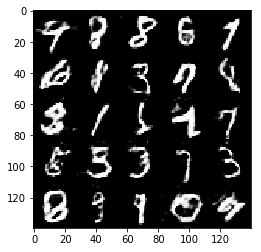

Epoch 2/2... Discriminator Loss: 0.6107... Generator Loss: 1.5890
Epoch 2/2... Discriminator Loss: 0.6011... Generator Loss: 2.0343
Epoch 2/2... Discriminator Loss: 0.7262... Generator Loss: 1.7599
Epoch 2/2... Discriminator Loss: 0.7782... Generator Loss: 1.5806
Epoch 2/2... Discriminator Loss: 0.7498... Generator Loss: 1.6894
Epoch 2/2... Discriminator Loss: 0.7552... Generator Loss: 1.5395
Epoch 2/2... Discriminator Loss: 0.8538... Generator Loss: 1.3253
Epoch 2/2... Discriminator Loss: 0.7391... Generator Loss: 1.6050
Epoch 2/2... Discriminator Loss: 0.7969... Generator Loss: 1.8939
Epoch 2/2... Discriminator Loss: 0.7599... Generator Loss: 1.7086


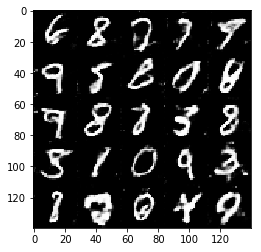

Epoch 2/2... Discriminator Loss: 0.6164... Generator Loss: 1.6084
Epoch 2/2... Discriminator Loss: 0.8844... Generator Loss: 1.6067
Epoch 2/2... Discriminator Loss: 0.8702... Generator Loss: 2.3809
Epoch 2/2... Discriminator Loss: 0.6224... Generator Loss: 1.6029
Epoch 2/2... Discriminator Loss: 0.7321... Generator Loss: 1.6130
Epoch 2/2... Discriminator Loss: 1.4547... Generator Loss: 0.8233
Epoch 2/2... Discriminator Loss: 0.8653... Generator Loss: 1.1767
Epoch 2/2... Discriminator Loss: 0.6756... Generator Loss: 2.4465
Epoch 2/2... Discriminator Loss: 0.6700... Generator Loss: 1.8507
Epoch 2/2... Discriminator Loss: 0.5573... Generator Loss: 2.0232


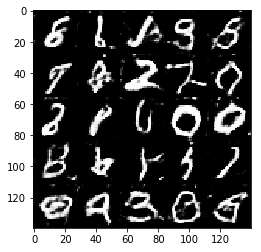

Epoch 2/2... Discriminator Loss: 0.6282... Generator Loss: 2.0393
Epoch 2/2... Discriminator Loss: 0.7234... Generator Loss: 1.4406
Epoch 2/2... Discriminator Loss: 1.2108... Generator Loss: 0.9476
Epoch 2/2... Discriminator Loss: 0.8933... Generator Loss: 1.4441
Epoch 2/2... Discriminator Loss: 0.4965... Generator Loss: 2.3384
Epoch 2/2... Discriminator Loss: 0.6049... Generator Loss: 2.5866
Epoch 2/2... Discriminator Loss: 1.0461... Generator Loss: 1.4638
Epoch 2/2... Discriminator Loss: 0.6284... Generator Loss: 2.0472
Epoch 2/2... Discriminator Loss: 1.4200... Generator Loss: 0.7174
Epoch 2/2... Discriminator Loss: 0.9262... Generator Loss: 0.9776


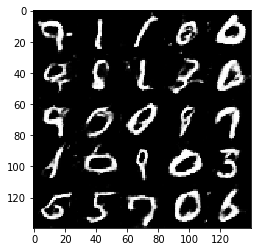

Epoch 2/2... Discriminator Loss: 0.7904... Generator Loss: 1.9576
Epoch 2/2... Discriminator Loss: 0.6923... Generator Loss: 1.4665
Epoch 2/2... Discriminator Loss: 0.9883... Generator Loss: 1.1138
Epoch 2/2... Discriminator Loss: 0.9900... Generator Loss: 1.3255
Epoch 2/2... Discriminator Loss: 0.9365... Generator Loss: 1.1428
Epoch 2/2... Discriminator Loss: 1.8178... Generator Loss: 0.6351
Epoch 2/2... Discriminator Loss: 0.8536... Generator Loss: 1.2392
Epoch 2/2... Discriminator Loss: 0.7064... Generator Loss: 1.7884
Epoch 2/2... Discriminator Loss: 0.8662... Generator Loss: 3.2724
Epoch 2/2... Discriminator Loss: 0.8429... Generator Loss: 1.1549


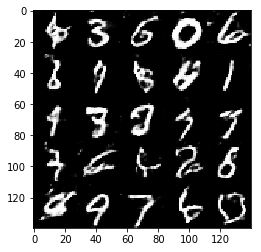

Epoch 2/2... Discriminator Loss: 1.0696... Generator Loss: 0.9140
Epoch 2/2... Discriminator Loss: 0.9020... Generator Loss: 1.2871
Epoch 2/2... Discriminator Loss: 0.6146... Generator Loss: 1.8017
Epoch 2/2... Discriminator Loss: 0.6917... Generator Loss: 2.6160
Epoch 2/2... Discriminator Loss: 0.6312... Generator Loss: 1.7678
Epoch 2/2... Discriminator Loss: 0.7034... Generator Loss: 2.6117
Epoch 2/2... Discriminator Loss: 0.7883... Generator Loss: 0.9778
Epoch 2/2... Discriminator Loss: 0.7831... Generator Loss: 1.5242
Epoch 2/2... Discriminator Loss: 0.8042... Generator Loss: 1.7431
Epoch 2/2... Discriminator Loss: 0.5885... Generator Loss: 2.4103


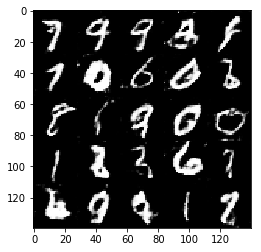

Epoch 2/2... Discriminator Loss: 0.6329... Generator Loss: 1.6739
Epoch 2/2... Discriminator Loss: 0.5887... Generator Loss: 3.0112
Epoch 2/2... Discriminator Loss: 1.1863... Generator Loss: 0.7336
Epoch 2/2... Discriminator Loss: 0.8027... Generator Loss: 1.5502
Epoch 2/2... Discriminator Loss: 0.7755... Generator Loss: 1.6127
Epoch 2/2... Discriminator Loss: 1.6702... Generator Loss: 0.6891
Epoch 2/2... Discriminator Loss: 0.7413... Generator Loss: 1.5452
Epoch 2/2... Discriminator Loss: 1.6675... Generator Loss: 0.6181
Epoch 2/2... Discriminator Loss: 0.6903... Generator Loss: 1.4354
Epoch 2/2... Discriminator Loss: 0.7314... Generator Loss: 2.1064


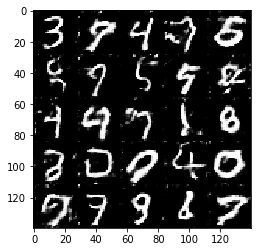

Epoch 2/2... Discriminator Loss: 2.1739... Generator Loss: 0.3594
Epoch 2/2... Discriminator Loss: 0.8319... Generator Loss: 3.3509
Epoch 2/2... Discriminator Loss: 1.0180... Generator Loss: 1.1053
Epoch 2/2... Discriminator Loss: 0.9632... Generator Loss: 1.3924
Epoch 2/2... Discriminator Loss: 0.6397... Generator Loss: 2.3672
Epoch 2/2... Discriminator Loss: 0.6756... Generator Loss: 1.6804
Epoch 2/2... Discriminator Loss: 0.6703... Generator Loss: 2.5087
Epoch 2/2... Discriminator Loss: 0.7453... Generator Loss: 1.1895
Epoch 2/2... Discriminator Loss: 0.6138... Generator Loss: 1.5058
Epoch 2/2... Discriminator Loss: 0.7522... Generator Loss: 3.3589


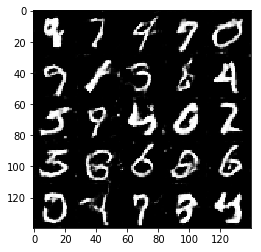

Epoch 2/2... Discriminator Loss: 0.7704... Generator Loss: 3.0337
Epoch 2/2... Discriminator Loss: 0.6030... Generator Loss: 1.7162
Epoch 2/2... Discriminator Loss: 0.7294... Generator Loss: 1.9857
Epoch 2/2... Discriminator Loss: 0.7700... Generator Loss: 1.1168
Epoch 2/2... Discriminator Loss: 0.6935... Generator Loss: 1.8585
Epoch 2/2... Discriminator Loss: 0.8425... Generator Loss: 3.6496
Epoch 2/2... Discriminator Loss: 0.7435... Generator Loss: 1.6675
Epoch 2/2... Discriminator Loss: 0.7178... Generator Loss: 2.3490
Epoch 2/2... Discriminator Loss: 1.2425... Generator Loss: 1.6321
Epoch 2/2... Discriminator Loss: 0.6973... Generator Loss: 2.4065


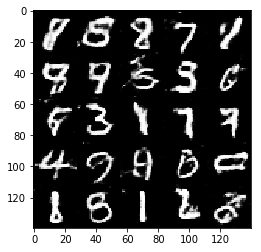

Epoch 2/2... Discriminator Loss: 0.8204... Generator Loss: 2.7853
Epoch 2/2... Discriminator Loss: 0.8138... Generator Loss: 3.1189
Epoch 2/2... Discriminator Loss: 1.0288... Generator Loss: 0.9288
Epoch 2/2... Discriminator Loss: 2.0235... Generator Loss: 5.3857
Epoch 2/2... Discriminator Loss: 0.5757... Generator Loss: 2.1780
Epoch 2/2... Discriminator Loss: 0.7963... Generator Loss: 1.7800
Epoch 2/2... Discriminator Loss: 1.1384... Generator Loss: 1.1276
Epoch 2/2... Discriminator Loss: 0.7603... Generator Loss: 3.3108
Epoch 2/2... Discriminator Loss: 0.8596... Generator Loss: 1.3080
Epoch 2/2... Discriminator Loss: 0.5889... Generator Loss: 2.2267


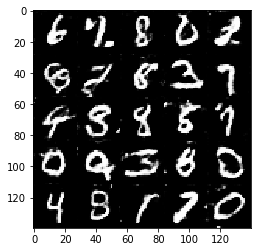

Epoch 2/2... Discriminator Loss: 1.1399... Generator Loss: 0.9839
Epoch 2/2... Discriminator Loss: 0.6703... Generator Loss: 3.3078
Epoch 2/2... Discriminator Loss: 1.9513... Generator Loss: 0.2684
Epoch 2/2... Discriminator Loss: 0.6181... Generator Loss: 2.1785
Epoch 2/2... Discriminator Loss: 0.6237... Generator Loss: 2.1154
Epoch 2/2... Discriminator Loss: 0.7124... Generator Loss: 1.3744
Epoch 2/2... Discriminator Loss: 1.0317... Generator Loss: 1.0333
Epoch 2/2... Discriminator Loss: 0.6262... Generator Loss: 1.6277
Epoch 2/2... Discriminator Loss: 0.5712... Generator Loss: 2.1679
Epoch 2/2... Discriminator Loss: 0.5642... Generator Loss: 1.8612


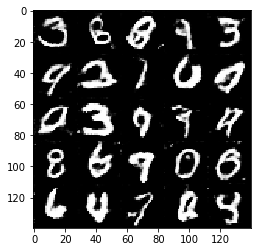

Epoch 2/2... Discriminator Loss: 0.8581... Generator Loss: 1.0547
Epoch 2/2... Discriminator Loss: 1.2176... Generator Loss: 0.7515
Epoch 2/2... Discriminator Loss: 0.9074... Generator Loss: 1.0908
Epoch 2/2... Discriminator Loss: 0.7581... Generator Loss: 1.6277
Epoch 2/2... Discriminator Loss: 0.5011... Generator Loss: 2.6802
Epoch 2/2... Discriminator Loss: 0.6417... Generator Loss: 2.0610
Epoch 2/2... Discriminator Loss: 0.5684... Generator Loss: 2.3121
Epoch 2/2... Discriminator Loss: 1.2654... Generator Loss: 0.7504
Epoch 2/2... Discriminator Loss: 0.8379... Generator Loss: 2.0416
Epoch 2/2... Discriminator Loss: 0.4851... Generator Loss: 3.3337


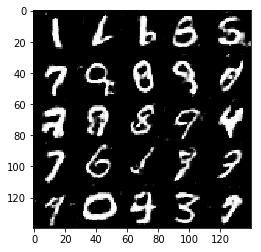

Epoch 2/2... Discriminator Loss: 1.0685... Generator Loss: 1.1103
Epoch 2/2... Discriminator Loss: 0.6154... Generator Loss: 2.9548
Epoch 2/2... Discriminator Loss: 0.9867... Generator Loss: 1.0588
Epoch 2/2... Discriminator Loss: 0.5376... Generator Loss: 2.0027
Epoch 2/2... Discriminator Loss: 0.7978... Generator Loss: 1.6858
Epoch 2/2... Discriminator Loss: 0.9840... Generator Loss: 1.5068
Epoch 2/2... Discriminator Loss: 1.6993... Generator Loss: 0.7054
Epoch 2/2... Discriminator Loss: 0.6351... Generator Loss: 1.4835
Epoch 2/2... Discriminator Loss: 1.2752... Generator Loss: 1.0375
Epoch 2/2... Discriminator Loss: 0.5459... Generator Loss: 1.9719


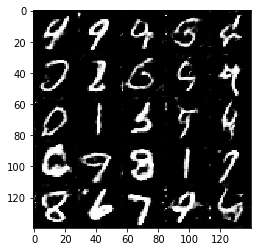

Epoch 2/2... Discriminator Loss: 0.5732... Generator Loss: 2.1859
Epoch 2/2... Discriminator Loss: 0.6584... Generator Loss: 1.8238
Epoch 2/2... Discriminator Loss: 0.9036... Generator Loss: 1.2326
Epoch 2/2... Discriminator Loss: 0.6597... Generator Loss: 2.5963
Epoch 2/2... Discriminator Loss: 0.5716... Generator Loss: 2.0931
Epoch 2/2... Discriminator Loss: 0.5545... Generator Loss: 2.0270
Epoch 2/2... Discriminator Loss: 0.8023... Generator Loss: 3.0752
Epoch 2/2... Discriminator Loss: 0.7061... Generator Loss: 2.8080
Epoch 2/2... Discriminator Loss: 0.6393... Generator Loss: 2.4877
Epoch 2/2... Discriminator Loss: 0.9205... Generator Loss: 3.9616


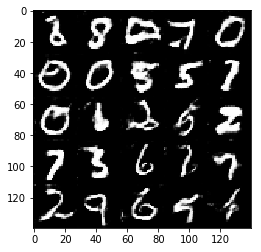

Epoch 2/2... Discriminator Loss: 1.2775... Generator Loss: 1.2830
Epoch 2/2... Discriminator Loss: 0.7282... Generator Loss: 2.8395
Epoch 2/2... Discriminator Loss: 0.6691... Generator Loss: 2.1826
Epoch 2/2... Discriminator Loss: 0.5339... Generator Loss: 2.6458
Epoch 2/2... Discriminator Loss: 0.5432... Generator Loss: 2.1177
Epoch 2/2... Discriminator Loss: 0.5661... Generator Loss: 1.9019
Epoch 2/2... Discriminator Loss: 0.5629... Generator Loss: 2.3636
Epoch 2/2... Discriminator Loss: 0.7429... Generator Loss: 3.2420
Epoch 2/2... Discriminator Loss: 1.4013... Generator Loss: 0.9823
Epoch 2/2... Discriminator Loss: 0.5844... Generator Loss: 1.7410


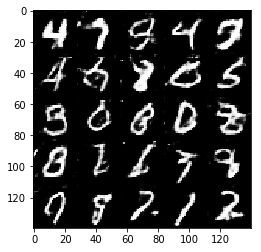

Epoch 2/2... Discriminator Loss: 0.7128... Generator Loss: 1.9517
Epoch 2/2... Discriminator Loss: 0.8947... Generator Loss: 1.1063
Epoch 2/2... Discriminator Loss: 0.5253... Generator Loss: 3.0329
Epoch 2/2... Discriminator Loss: 0.8693... Generator Loss: 1.3061
Epoch 2/2... Discriminator Loss: 0.7072... Generator Loss: 2.8198
Epoch 2/2... Discriminator Loss: 0.6940... Generator Loss: 1.0792
Epoch 2/2... Discriminator Loss: 0.7368... Generator Loss: 1.6666
Epoch 2/2... Discriminator Loss: 0.6442... Generator Loss: 1.2551
Epoch 2/2... Discriminator Loss: 0.5182... Generator Loss: 3.0442
Epoch 2/2... Discriminator Loss: 0.4970... Generator Loss: 2.6323


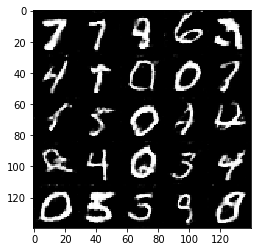

Epoch 2/2... Discriminator Loss: 1.0776... Generator Loss: 0.8770
Epoch 2/2... Discriminator Loss: 0.6406... Generator Loss: 2.1050
Epoch 2/2... Discriminator Loss: 0.9960... Generator Loss: 4.5690
Epoch 2/2... Discriminator Loss: 0.5954... Generator Loss: 2.6019
Epoch 2/2... Discriminator Loss: 0.6044... Generator Loss: 2.6911
Epoch 2/2... Discriminator Loss: 0.6046... Generator Loss: 3.1962
Epoch 2/2... Discriminator Loss: 0.5756... Generator Loss: 1.9238
Epoch 2/2... Discriminator Loss: 1.0057... Generator Loss: 1.0066
Epoch 2/2... Discriminator Loss: 0.5484... Generator Loss: 2.5299
Epoch 2/2... Discriminator Loss: 0.5453... Generator Loss: 2.0412


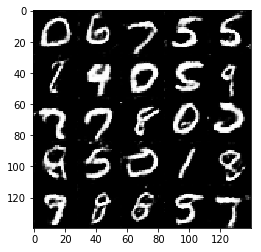

Epoch 2/2... Discriminator Loss: 0.8656... Generator Loss: 2.2413
Epoch 2/2... Discriminator Loss: 0.7537... Generator Loss: 2.0534
Epoch 2/2... Discriminator Loss: 1.5014... Generator Loss: 0.7083
Epoch 2/2... Discriminator Loss: 0.5619... Generator Loss: 2.8650
Epoch 2/2... Discriminator Loss: 0.8225... Generator Loss: 1.4655
Epoch 2/2... Discriminator Loss: 0.5013... Generator Loss: 2.7913
Epoch 2/2... Discriminator Loss: 0.5661... Generator Loss: 2.0698
Epoch 2/2... Discriminator Loss: 1.0539... Generator Loss: 0.8981
Epoch 2/2... Discriminator Loss: 0.9161... Generator Loss: 1.7244
Epoch 2/2... Discriminator Loss: 0.5310... Generator Loss: 2.1753


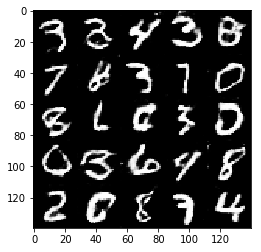

Epoch 2/2... Discriminator Loss: 0.6093... Generator Loss: 1.9620
Epoch 2/2... Discriminator Loss: 0.8345... Generator Loss: 0.9002
Epoch 2/2... Discriminator Loss: 0.5656... Generator Loss: 3.0960
Epoch 2/2... Discriminator Loss: 0.9607... Generator Loss: 1.3680
Epoch 2/2... Discriminator Loss: 0.7200... Generator Loss: 2.0561
Epoch 2/2... Discriminator Loss: 1.9446... Generator Loss: 3.2039
Epoch 2/2... Discriminator Loss: 0.7129... Generator Loss: 2.5086
Epoch 2/2... Discriminator Loss: 0.7368... Generator Loss: 1.6141
Epoch 2/2... Discriminator Loss: 0.5719... Generator Loss: 3.0699
Epoch 2/2... Discriminator Loss: 0.6809... Generator Loss: 1.6953


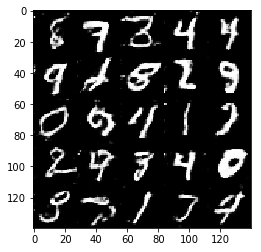

Epoch 2/2... Discriminator Loss: 0.5215... Generator Loss: 2.8029
Epoch 2/2... Discriminator Loss: 0.4428... Generator Loss: 2.9910
Epoch 2/2... Discriminator Loss: 0.5306... Generator Loss: 2.4820
Epoch 2/2... Discriminator Loss: 0.7533... Generator Loss: 1.2656
Epoch 2/2... Discriminator Loss: 0.6211... Generator Loss: 4.0673


In [96]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.9097... Generator Loss: 0.9501
Epoch 1/1... Discriminator Loss: 0.8074... Generator Loss: 2.1991
Epoch 1/1... Discriminator Loss: 0.9946... Generator Loss: 2.0457
Epoch 1/1... Discriminator Loss: 0.6810... Generator Loss: 1.8168
Epoch 1/1... Discriminator Loss: 0.6116... Generator Loss: 2.2037
Epoch 1/1... Discriminator Loss: 0.4046... Generator Loss: 3.9705
Epoch 1/1... Discriminator Loss: 1.1580... Generator Loss: 0.8720
Epoch 1/1... Discriminator Loss: 0.5025... Generator Loss: 2.9701
Epoch 1/1... Discriminator Loss: 0.6098... Generator Loss: 2.1434
Epoch 1/1... Discriminator Loss: 0.5297... Generator Loss: 4.2449


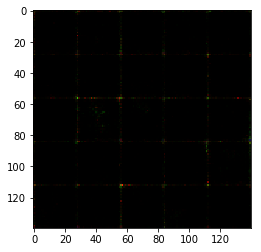

Epoch 1/1... Discriminator Loss: 0.4074... Generator Loss: 3.6910
Epoch 1/1... Discriminator Loss: 0.4819... Generator Loss: 2.5287
Epoch 1/1... Discriminator Loss: 0.4257... Generator Loss: 3.7380
Epoch 1/1... Discriminator Loss: 0.6935... Generator Loss: 1.6148
Epoch 1/1... Discriminator Loss: 0.6045... Generator Loss: 3.2034
Epoch 1/1... Discriminator Loss: 4.1778... Generator Loss: 5.5403
Epoch 1/1... Discriminator Loss: 0.7738... Generator Loss: 1.3478
Epoch 1/1... Discriminator Loss: 0.7808... Generator Loss: 1.3988
Epoch 1/1... Discriminator Loss: 1.0016... Generator Loss: 0.9684
Epoch 1/1... Discriminator Loss: 1.9740... Generator Loss: 0.3583


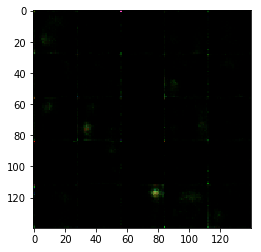

Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 0.9448
Epoch 1/1... Discriminator Loss: 2.0016... Generator Loss: 0.2395
Epoch 1/1... Discriminator Loss: 1.2139... Generator Loss: 0.6952
Epoch 1/1... Discriminator Loss: 1.0721... Generator Loss: 1.6248
Epoch 1/1... Discriminator Loss: 0.9763... Generator Loss: 0.9335
Epoch 1/1... Discriminator Loss: 0.9590... Generator Loss: 1.8347
Epoch 1/1... Discriminator Loss: 1.1384... Generator Loss: 0.8803
Epoch 1/1... Discriminator Loss: 0.8843... Generator Loss: 1.4902
Epoch 1/1... Discriminator Loss: 1.1012... Generator Loss: 1.2794
Epoch 1/1... Discriminator Loss: 1.2149... Generator Loss: 1.0218


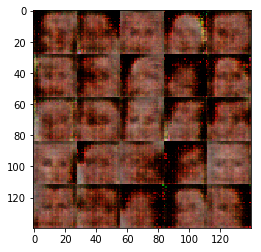

Epoch 1/1... Discriminator Loss: 1.2579... Generator Loss: 1.4574
Epoch 1/1... Discriminator Loss: 1.3581... Generator Loss: 2.5730
Epoch 1/1... Discriminator Loss: 2.1703... Generator Loss: 3.0525
Epoch 1/1... Discriminator Loss: 0.9329... Generator Loss: 1.2632
Epoch 1/1... Discriminator Loss: 1.3434... Generator Loss: 0.7777
Epoch 1/1... Discriminator Loss: 0.9349... Generator Loss: 1.3455
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.7895
Epoch 1/1... Discriminator Loss: 1.3855... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 0.9809... Generator Loss: 0.8882
Epoch 1/1... Discriminator Loss: 0.8797... Generator Loss: 1.4740


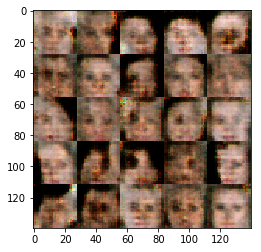

Epoch 1/1... Discriminator Loss: 1.1158... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 1.2404... Generator Loss: 0.9286
Epoch 1/1... Discriminator Loss: 0.9957... Generator Loss: 1.1851
Epoch 1/1... Discriminator Loss: 1.2389... Generator Loss: 0.8528
Epoch 1/1... Discriminator Loss: 1.0747... Generator Loss: 1.3726
Epoch 1/1... Discriminator Loss: 0.7994... Generator Loss: 1.1748
Epoch 1/1... Discriminator Loss: 0.9963... Generator Loss: 1.5118
Epoch 1/1... Discriminator Loss: 1.1845... Generator Loss: 1.2376
Epoch 1/1... Discriminator Loss: 1.2050... Generator Loss: 0.7438
Epoch 1/1... Discriminator Loss: 1.3287... Generator Loss: 1.1377


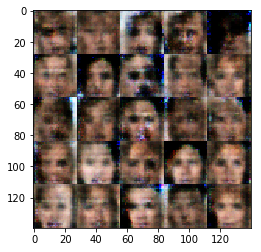

Epoch 1/1... Discriminator Loss: 0.9000... Generator Loss: 1.0740
Epoch 1/1... Discriminator Loss: 0.8665... Generator Loss: 1.2277
Epoch 1/1... Discriminator Loss: 1.5260... Generator Loss: 0.9581
Epoch 1/1... Discriminator Loss: 1.0723... Generator Loss: 1.6225
Epoch 1/1... Discriminator Loss: 0.9037... Generator Loss: 1.1789
Epoch 1/1... Discriminator Loss: 1.1195... Generator Loss: 1.1999
Epoch 1/1... Discriminator Loss: 1.2221... Generator Loss: 1.4222
Epoch 1/1... Discriminator Loss: 0.8941... Generator Loss: 1.3760
Epoch 1/1... Discriminator Loss: 0.7271... Generator Loss: 2.0319
Epoch 1/1... Discriminator Loss: 0.9634... Generator Loss: 0.9377


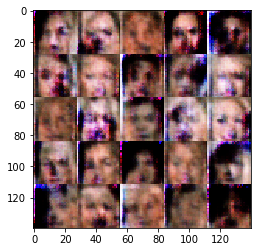

Epoch 1/1... Discriminator Loss: 1.1961... Generator Loss: 0.7377
Epoch 1/1... Discriminator Loss: 1.2673... Generator Loss: 0.9257
Epoch 1/1... Discriminator Loss: 0.9443... Generator Loss: 1.0575
Epoch 1/1... Discriminator Loss: 1.0697... Generator Loss: 0.9666
Epoch 1/1... Discriminator Loss: 1.0962... Generator Loss: 1.4710
Epoch 1/1... Discriminator Loss: 1.6281... Generator Loss: 0.3380
Epoch 1/1... Discriminator Loss: 1.0238... Generator Loss: 1.2819
Epoch 1/1... Discriminator Loss: 1.4910... Generator Loss: 2.4191
Epoch 1/1... Discriminator Loss: 1.1688... Generator Loss: 1.4930
Epoch 1/1... Discriminator Loss: 0.8938... Generator Loss: 1.3793


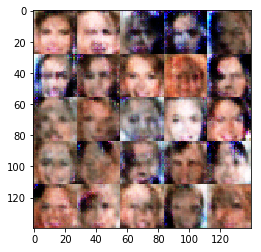

Epoch 1/1... Discriminator Loss: 1.2278... Generator Loss: 1.0133
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.5548
Epoch 1/1... Discriminator Loss: 1.4202... Generator Loss: 0.5457
Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.6260
Epoch 1/1... Discriminator Loss: 1.2742... Generator Loss: 0.9494
Epoch 1/1... Discriminator Loss: 1.1084... Generator Loss: 1.4414
Epoch 1/1... Discriminator Loss: 1.1318... Generator Loss: 2.3368
Epoch 1/1... Discriminator Loss: 1.2100... Generator Loss: 0.7043
Epoch 1/1... Discriminator Loss: 1.3100... Generator Loss: 0.6537
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.8108


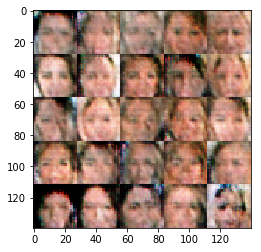

Epoch 1/1... Discriminator Loss: 1.0860... Generator Loss: 1.5051
Epoch 1/1... Discriminator Loss: 1.0925... Generator Loss: 1.1114
Epoch 1/1... Discriminator Loss: 1.2811... Generator Loss: 2.2697
Epoch 1/1... Discriminator Loss: 1.3359... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 1.2749... Generator Loss: 1.0199
Epoch 1/1... Discriminator Loss: 1.0367... Generator Loss: 0.8758
Epoch 1/1... Discriminator Loss: 1.2966... Generator Loss: 1.0868
Epoch 1/1... Discriminator Loss: 2.1235... Generator Loss: 0.2141
Epoch 1/1... Discriminator Loss: 1.0726... Generator Loss: 1.1052
Epoch 1/1... Discriminator Loss: 1.0839... Generator Loss: 1.3386


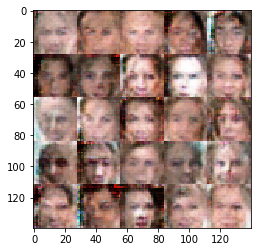

Epoch 1/1... Discriminator Loss: 1.0244... Generator Loss: 1.5464
Epoch 1/1... Discriminator Loss: 1.1946... Generator Loss: 1.2768
Epoch 1/1... Discriminator Loss: 1.2569... Generator Loss: 1.2872
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 1.2208
Epoch 1/1... Discriminator Loss: 1.1088... Generator Loss: 0.9841
Epoch 1/1... Discriminator Loss: 1.4149... Generator Loss: 1.0248
Epoch 1/1... Discriminator Loss: 1.0281... Generator Loss: 0.9622
Epoch 1/1... Discriminator Loss: 1.2405... Generator Loss: 1.2604
Epoch 1/1... Discriminator Loss: 1.2049... Generator Loss: 1.0104
Epoch 1/1... Discriminator Loss: 1.1691... Generator Loss: 1.2732


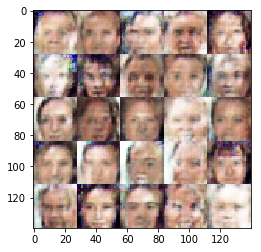

Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.8653
Epoch 1/1... Discriminator Loss: 1.1578... Generator Loss: 0.9598
Epoch 1/1... Discriminator Loss: 1.2568... Generator Loss: 0.8836
Epoch 1/1... Discriminator Loss: 0.9731... Generator Loss: 0.9784
Epoch 1/1... Discriminator Loss: 1.1385... Generator Loss: 0.9285
Epoch 1/1... Discriminator Loss: 1.3274... Generator Loss: 0.7875
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 1.2926
Epoch 1/1... Discriminator Loss: 1.3224... Generator Loss: 0.6494
Epoch 1/1... Discriminator Loss: 1.4696... Generator Loss: 0.8880
Epoch 1/1... Discriminator Loss: 1.5090... Generator Loss: 0.5454


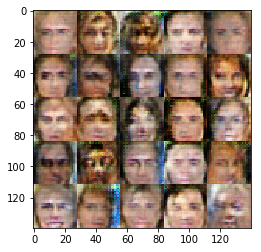

Epoch 1/1... Discriminator Loss: 1.2613... Generator Loss: 1.6127
Epoch 1/1... Discriminator Loss: 1.1375... Generator Loss: 1.0477
Epoch 1/1... Discriminator Loss: 1.3167... Generator Loss: 0.8243
Epoch 1/1... Discriminator Loss: 1.5175... Generator Loss: 0.5685
Epoch 1/1... Discriminator Loss: 1.0241... Generator Loss: 1.0751
Epoch 1/1... Discriminator Loss: 1.1455... Generator Loss: 1.1305
Epoch 1/1... Discriminator Loss: 1.1628... Generator Loss: 1.0133
Epoch 1/1... Discriminator Loss: 1.1487... Generator Loss: 0.9145
Epoch 1/1... Discriminator Loss: 1.1831... Generator Loss: 1.0374
Epoch 1/1... Discriminator Loss: 1.2856... Generator Loss: 0.6873


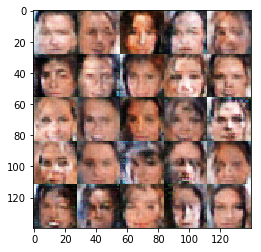

Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.6588
Epoch 1/1... Discriminator Loss: 1.4858... Generator Loss: 1.0116
Epoch 1/1... Discriminator Loss: 0.9411... Generator Loss: 1.3736
Epoch 1/1... Discriminator Loss: 1.5623... Generator Loss: 1.5430
Epoch 1/1... Discriminator Loss: 1.2757... Generator Loss: 0.8733
Epoch 1/1... Discriminator Loss: 1.1853... Generator Loss: 1.0811
Epoch 1/1... Discriminator Loss: 1.1068... Generator Loss: 1.1535
Epoch 1/1... Discriminator Loss: 1.3139... Generator Loss: 0.6977
Epoch 1/1... Discriminator Loss: 1.0256... Generator Loss: 1.1480
Epoch 1/1... Discriminator Loss: 1.1109... Generator Loss: 1.0358


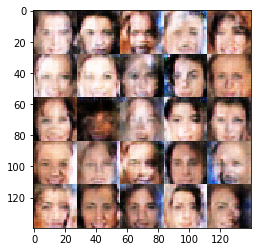

Epoch 1/1... Discriminator Loss: 1.3106... Generator Loss: 0.6888
Epoch 1/1... Discriminator Loss: 1.1214... Generator Loss: 1.1220
Epoch 1/1... Discriminator Loss: 1.0189... Generator Loss: 1.1240
Epoch 1/1... Discriminator Loss: 1.2707... Generator Loss: 1.0504
Epoch 1/1... Discriminator Loss: 1.0633... Generator Loss: 0.9655
Epoch 1/1... Discriminator Loss: 1.2180... Generator Loss: 0.8612
Epoch 1/1... Discriminator Loss: 1.0472... Generator Loss: 1.2637
Epoch 1/1... Discriminator Loss: 1.2592... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 1.1458... Generator Loss: 0.9704
Epoch 1/1... Discriminator Loss: 1.0534... Generator Loss: 1.4211


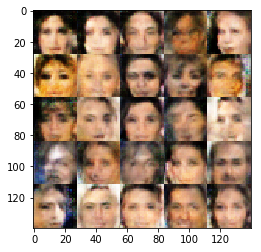

Epoch 1/1... Discriminator Loss: 1.2358... Generator Loss: 1.1217
Epoch 1/1... Discriminator Loss: 1.1310... Generator Loss: 0.9106
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.6708
Epoch 1/1... Discriminator Loss: 1.2081... Generator Loss: 1.0505
Epoch 1/1... Discriminator Loss: 1.1199... Generator Loss: 1.1108
Epoch 1/1... Discriminator Loss: 1.2293... Generator Loss: 0.9711
Epoch 1/1... Discriminator Loss: 1.1288... Generator Loss: 1.2051
Epoch 1/1... Discriminator Loss: 1.4204... Generator Loss: 0.6049
Epoch 1/1... Discriminator Loss: 0.9782... Generator Loss: 0.9763
Epoch 1/1... Discriminator Loss: 1.1089... Generator Loss: 1.0020


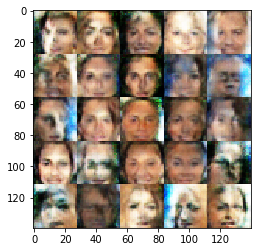

Epoch 1/1... Discriminator Loss: 1.1081... Generator Loss: 1.2833
Epoch 1/1... Discriminator Loss: 1.1856... Generator Loss: 0.8622
Epoch 1/1... Discriminator Loss: 1.1072... Generator Loss: 0.9328
Epoch 1/1... Discriminator Loss: 1.1006... Generator Loss: 0.9540
Epoch 1/1... Discriminator Loss: 1.0708... Generator Loss: 0.8302
Epoch 1/1... Discriminator Loss: 1.2393... Generator Loss: 0.7533
Epoch 1/1... Discriminator Loss: 1.1479... Generator Loss: 0.6823
Epoch 1/1... Discriminator Loss: 1.0575... Generator Loss: 1.3008
Epoch 1/1... Discriminator Loss: 1.1380... Generator Loss: 0.9659
Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 1.1021


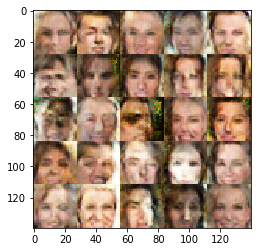

Epoch 1/1... Discriminator Loss: 1.0492... Generator Loss: 1.1746
Epoch 1/1... Discriminator Loss: 1.2458... Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 1.2136... Generator Loss: 0.8537
Epoch 1/1... Discriminator Loss: 1.3008... Generator Loss: 0.7621
Epoch 1/1... Discriminator Loss: 1.0093... Generator Loss: 0.9766
Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 1.1527
Epoch 1/1... Discriminator Loss: 1.2809... Generator Loss: 0.5610
Epoch 1/1... Discriminator Loss: 1.1451... Generator Loss: 1.1211
Epoch 1/1... Discriminator Loss: 1.0425... Generator Loss: 0.9378
Epoch 1/1... Discriminator Loss: 1.0938... Generator Loss: 1.4250


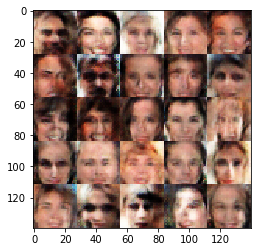

Epoch 1/1... Discriminator Loss: 1.1720... Generator Loss: 0.8844
Epoch 1/1... Discriminator Loss: 1.1139... Generator Loss: 1.1087
Epoch 1/1... Discriminator Loss: 1.1444... Generator Loss: 0.8102
Epoch 1/1... Discriminator Loss: 1.1529... Generator Loss: 1.2889
Epoch 1/1... Discriminator Loss: 1.0602... Generator Loss: 1.2038
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 1.2157
Epoch 1/1... Discriminator Loss: 1.0003... Generator Loss: 1.3991
Epoch 1/1... Discriminator Loss: 1.1953... Generator Loss: 0.9857
Epoch 1/1... Discriminator Loss: 1.2141... Generator Loss: 1.2942
Epoch 1/1... Discriminator Loss: 1.2315... Generator Loss: 0.6650


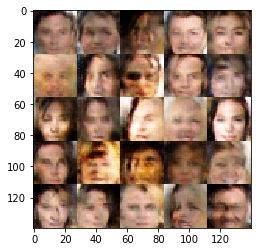

Epoch 1/1... Discriminator Loss: 1.2005... Generator Loss: 0.7754
Epoch 1/1... Discriminator Loss: 1.3700... Generator Loss: 0.7862
Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 0.7877
Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.8290
Epoch 1/1... Discriminator Loss: 1.0784... Generator Loss: 1.0283
Epoch 1/1... Discriminator Loss: 1.1133... Generator Loss: 1.1141
Epoch 1/1... Discriminator Loss: 1.1591... Generator Loss: 0.8488
Epoch 1/1... Discriminator Loss: 1.5713... Generator Loss: 0.5022
Epoch 1/1... Discriminator Loss: 1.0479... Generator Loss: 1.2203
Epoch 1/1... Discriminator Loss: 1.1164... Generator Loss: 1.2080


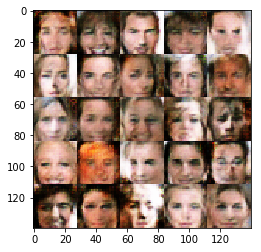

Epoch 1/1... Discriminator Loss: 1.0063... Generator Loss: 1.2124
Epoch 1/1... Discriminator Loss: 1.0958... Generator Loss: 0.9310
Epoch 1/1... Discriminator Loss: 1.2598... Generator Loss: 0.8099
Epoch 1/1... Discriminator Loss: 0.9906... Generator Loss: 1.1874
Epoch 1/1... Discriminator Loss: 1.1263... Generator Loss: 1.0833
Epoch 1/1... Discriminator Loss: 1.2428... Generator Loss: 0.7368
Epoch 1/1... Discriminator Loss: 1.4184... Generator Loss: 0.8090
Epoch 1/1... Discriminator Loss: 1.0095... Generator Loss: 1.5351
Epoch 1/1... Discriminator Loss: 1.0062... Generator Loss: 0.9520
Epoch 1/1... Discriminator Loss: 1.2004... Generator Loss: 1.2491


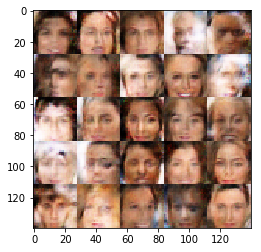

Epoch 1/1... Discriminator Loss: 1.1478... Generator Loss: 1.1731
Epoch 1/1... Discriminator Loss: 0.9899... Generator Loss: 0.9938
Epoch 1/1... Discriminator Loss: 1.2465... Generator Loss: 0.5539
Epoch 1/1... Discriminator Loss: 1.0767... Generator Loss: 1.2273
Epoch 1/1... Discriminator Loss: 1.0953... Generator Loss: 1.0994
Epoch 1/1... Discriminator Loss: 1.1605... Generator Loss: 0.9909
Epoch 1/1... Discriminator Loss: 1.1460... Generator Loss: 1.1551
Epoch 1/1... Discriminator Loss: 1.0883... Generator Loss: 1.2621
Epoch 1/1... Discriminator Loss: 1.1652... Generator Loss: 0.9096
Epoch 1/1... Discriminator Loss: 1.1109... Generator Loss: 0.9899


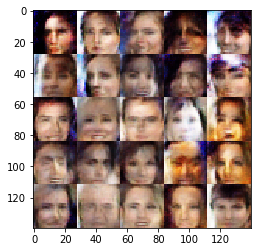

Epoch 1/1... Discriminator Loss: 1.1012... Generator Loss: 0.8496
Epoch 1/1... Discriminator Loss: 1.0832... Generator Loss: 1.3167
Epoch 1/1... Discriminator Loss: 1.2077... Generator Loss: 0.7769
Epoch 1/1... Discriminator Loss: 1.1758... Generator Loss: 1.1979
Epoch 1/1... Discriminator Loss: 1.3213... Generator Loss: 0.7602
Epoch 1/1... Discriminator Loss: 1.0628... Generator Loss: 1.1458
Epoch 1/1... Discriminator Loss: 1.0125... Generator Loss: 1.0363
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 1.0260
Epoch 1/1... Discriminator Loss: 1.2225... Generator Loss: 1.2672
Epoch 1/1... Discriminator Loss: 1.3036... Generator Loss: 0.7015


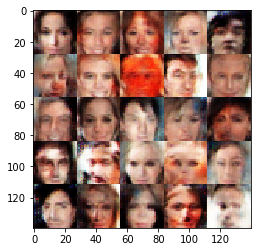

Epoch 1/1... Discriminator Loss: 0.9836... Generator Loss: 0.8726
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 0.7974
Epoch 1/1... Discriminator Loss: 0.9621... Generator Loss: 1.0459
Epoch 1/1... Discriminator Loss: 1.1736... Generator Loss: 0.7405
Epoch 1/1... Discriminator Loss: 1.0480... Generator Loss: 0.8819
Epoch 1/1... Discriminator Loss: 0.9548... Generator Loss: 1.1601
Epoch 1/1... Discriminator Loss: 1.2058... Generator Loss: 1.4332
Epoch 1/1... Discriminator Loss: 1.1442... Generator Loss: 0.9567
Epoch 1/1... Discriminator Loss: 1.1358... Generator Loss: 0.8566
Epoch 1/1... Discriminator Loss: 1.0185... Generator Loss: 1.0130


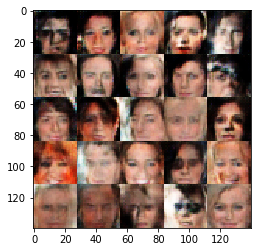

Epoch 1/1... Discriminator Loss: 0.9938... Generator Loss: 1.0151
Epoch 1/1... Discriminator Loss: 0.9917... Generator Loss: 1.4303
Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.8417
Epoch 1/1... Discriminator Loss: 1.0869... Generator Loss: 0.8889
Epoch 1/1... Discriminator Loss: 1.0802... Generator Loss: 1.3042
Epoch 1/1... Discriminator Loss: 1.0812... Generator Loss: 1.1361
Epoch 1/1... Discriminator Loss: 0.8679... Generator Loss: 1.4205
Epoch 1/1... Discriminator Loss: 1.1053... Generator Loss: 1.1660
Epoch 1/1... Discriminator Loss: 1.0609... Generator Loss: 0.8584
Epoch 1/1... Discriminator Loss: 0.9862... Generator Loss: 1.1168


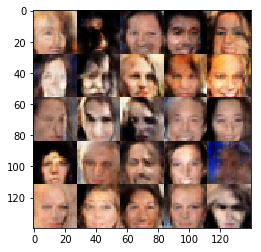

Epoch 1/1... Discriminator Loss: 1.3281... Generator Loss: 0.5094
Epoch 1/1... Discriminator Loss: 1.1736... Generator Loss: 0.8835
Epoch 1/1... Discriminator Loss: 1.1791... Generator Loss: 1.2758
Epoch 1/1... Discriminator Loss: 0.9876... Generator Loss: 1.0837
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 1.1020
Epoch 1/1... Discriminator Loss: 1.1885... Generator Loss: 1.5475
Epoch 1/1... Discriminator Loss: 1.2262... Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.0887... Generator Loss: 0.8660
Epoch 1/1... Discriminator Loss: 1.1755... Generator Loss: 1.7787
Epoch 1/1... Discriminator Loss: 1.1640... Generator Loss: 1.8245


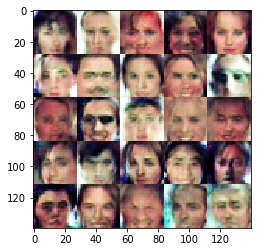

Epoch 1/1... Discriminator Loss: 0.9710... Generator Loss: 1.3594
Epoch 1/1... Discriminator Loss: 1.1395... Generator Loss: 0.8949
Epoch 1/1... Discriminator Loss: 1.0680... Generator Loss: 1.4406
Epoch 1/1... Discriminator Loss: 1.0935... Generator Loss: 1.0160
Epoch 1/1... Discriminator Loss: 1.2038... Generator Loss: 0.6933
Epoch 1/1... Discriminator Loss: 0.8429... Generator Loss: 1.3878
Epoch 1/1... Discriminator Loss: 1.2946... Generator Loss: 0.6205
Epoch 1/1... Discriminator Loss: 1.1359... Generator Loss: 0.9469
Epoch 1/1... Discriminator Loss: 1.1053... Generator Loss: 1.2488
Epoch 1/1... Discriminator Loss: 0.9534... Generator Loss: 0.8761


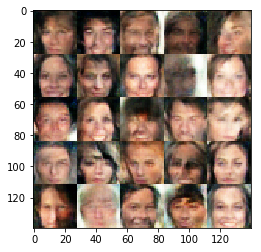

Epoch 1/1... Discriminator Loss: 1.2879... Generator Loss: 0.8021
Epoch 1/1... Discriminator Loss: 0.9259... Generator Loss: 1.3692
Epoch 1/1... Discriminator Loss: 1.0396... Generator Loss: 1.5590
Epoch 1/1... Discriminator Loss: 1.1410... Generator Loss: 0.9728
Epoch 1/1... Discriminator Loss: 1.1375... Generator Loss: 0.8130
Epoch 1/1... Discriminator Loss: 1.2021... Generator Loss: 0.9953
Epoch 1/1... Discriminator Loss: 0.9513... Generator Loss: 1.1239
Epoch 1/1... Discriminator Loss: 1.0370... Generator Loss: 1.0762
Epoch 1/1... Discriminator Loss: 0.9947... Generator Loss: 1.3484
Epoch 1/1... Discriminator Loss: 1.0153... Generator Loss: 1.1683


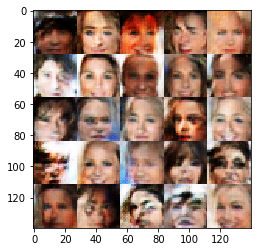

Epoch 1/1... Discriminator Loss: 1.5457... Generator Loss: 0.5356
Epoch 1/1... Discriminator Loss: 1.0543... Generator Loss: 1.3871
Epoch 1/1... Discriminator Loss: 1.0469... Generator Loss: 0.9997
Epoch 1/1... Discriminator Loss: 1.1038... Generator Loss: 0.9125
Epoch 1/1... Discriminator Loss: 0.9793... Generator Loss: 1.3201
Epoch 1/1... Discriminator Loss: 0.9968... Generator Loss: 1.1123
Epoch 1/1... Discriminator Loss: 1.0278... Generator Loss: 1.0464
Epoch 1/1... Discriminator Loss: 1.0984... Generator Loss: 0.8888
Epoch 1/1... Discriminator Loss: 1.0810... Generator Loss: 1.0405
Epoch 1/1... Discriminator Loss: 0.9646... Generator Loss: 1.2603


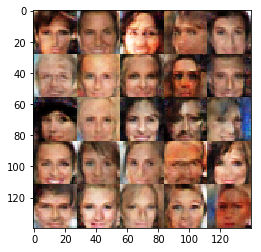

Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 0.7257
Epoch 1/1... Discriminator Loss: 1.0243... Generator Loss: 1.3262
Epoch 1/1... Discriminator Loss: 0.9705... Generator Loss: 1.2079
Epoch 1/1... Discriminator Loss: 0.9738... Generator Loss: 1.3579
Epoch 1/1... Discriminator Loss: 0.9991... Generator Loss: 1.2609
Epoch 1/1... Discriminator Loss: 1.0833... Generator Loss: 1.1729
Epoch 1/1... Discriminator Loss: 1.0542... Generator Loss: 1.2434
Epoch 1/1... Discriminator Loss: 1.0344... Generator Loss: 1.0932
Epoch 1/1... Discriminator Loss: 1.1444... Generator Loss: 1.3882
Epoch 1/1... Discriminator Loss: 1.0958... Generator Loss: 0.9658


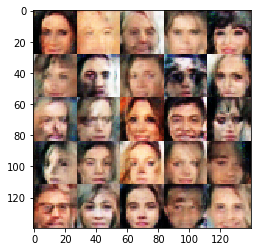

Epoch 1/1... Discriminator Loss: 0.9696... Generator Loss: 1.1580
Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 1.2050
Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 1.9688
Epoch 1/1... Discriminator Loss: 1.2100... Generator Loss: 0.8594
Epoch 1/1... Discriminator Loss: 1.1845... Generator Loss: 0.7769
Epoch 1/1... Discriminator Loss: 1.0698... Generator Loss: 1.1585
Epoch 1/1... Discriminator Loss: 1.2072... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 1.0113... Generator Loss: 1.1687
Epoch 1/1... Discriminator Loss: 0.9983... Generator Loss: 1.1463
Epoch 1/1... Discriminator Loss: 1.0866... Generator Loss: 1.2408


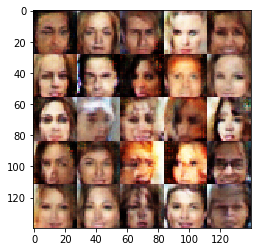

Epoch 1/1... Discriminator Loss: 1.0314... Generator Loss: 0.9779
Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 1.6752
Epoch 1/1... Discriminator Loss: 1.1243... Generator Loss: 0.9454
Epoch 1/1... Discriminator Loss: 1.2379... Generator Loss: 0.7234
Epoch 1/1... Discriminator Loss: 1.0366... Generator Loss: 0.8797
Epoch 1/1... Discriminator Loss: 1.4986... Generator Loss: 0.6007
Epoch 1/1... Discriminator Loss: 1.1286... Generator Loss: 0.7643
Epoch 1/1... Discriminator Loss: 0.9420... Generator Loss: 1.5072
Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 0.7306
Epoch 1/1... Discriminator Loss: 1.1921... Generator Loss: 1.6647


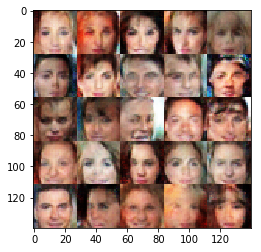

Epoch 1/1... Discriminator Loss: 1.3166... Generator Loss: 0.5631
Epoch 1/1... Discriminator Loss: 1.0955... Generator Loss: 1.0140
Epoch 1/1... Discriminator Loss: 0.9888... Generator Loss: 1.1372
Epoch 1/1... Discriminator Loss: 1.1907... Generator Loss: 0.6907
Epoch 1/1... Discriminator Loss: 1.0027... Generator Loss: 1.0947
Epoch 1/1... Discriminator Loss: 0.9711... Generator Loss: 1.3518
Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 1.3081
Epoch 1/1... Discriminator Loss: 0.9099... Generator Loss: 1.6286
Epoch 1/1... Discriminator Loss: 1.0005... Generator Loss: 1.2140
Epoch 1/1... Discriminator Loss: 0.9757... Generator Loss: 1.1197


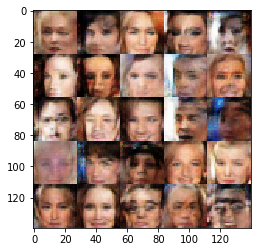

Epoch 1/1... Discriminator Loss: 1.1093... Generator Loss: 1.7963
Epoch 1/1... Discriminator Loss: 1.1565... Generator Loss: 1.0753
Epoch 1/1... Discriminator Loss: 1.0044... Generator Loss: 1.5806
Epoch 1/1... Discriminator Loss: 1.1434... Generator Loss: 1.2135
Epoch 1/1... Discriminator Loss: 1.0998... Generator Loss: 0.7073
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 1.5086
Epoch 1/1... Discriminator Loss: 1.0610... Generator Loss: 1.1065
Epoch 1/1... Discriminator Loss: 1.1614... Generator Loss: 0.6356
Epoch 1/1... Discriminator Loss: 0.8411... Generator Loss: 1.4084
Epoch 1/1... Discriminator Loss: 1.0837... Generator Loss: 1.3610


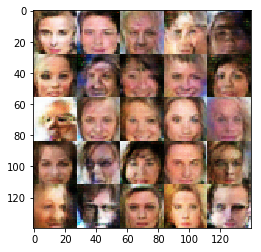

Epoch 1/1... Discriminator Loss: 1.0898... Generator Loss: 0.9016
Epoch 1/1... Discriminator Loss: 1.1987... Generator Loss: 0.7885
Epoch 1/1... Discriminator Loss: 0.9332... Generator Loss: 1.1412
Epoch 1/1... Discriminator Loss: 1.1523... Generator Loss: 0.9126
Epoch 1/1... Discriminator Loss: 1.0415... Generator Loss: 1.3537
Epoch 1/1... Discriminator Loss: 1.0601... Generator Loss: 0.9522
Epoch 1/1... Discriminator Loss: 1.0293... Generator Loss: 0.7496
Epoch 1/1... Discriminator Loss: 1.1021... Generator Loss: 1.0316
Epoch 1/1... Discriminator Loss: 1.0797... Generator Loss: 1.0333
Epoch 1/1... Discriminator Loss: 0.9730... Generator Loss: 1.0991


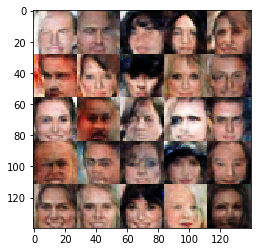

Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 0.6133
Epoch 1/1... Discriminator Loss: 0.8845... Generator Loss: 1.3079
Epoch 1/1... Discriminator Loss: 1.3038... Generator Loss: 1.5532
Epoch 1/1... Discriminator Loss: 0.8831... Generator Loss: 1.5302
Epoch 1/1... Discriminator Loss: 0.9032... Generator Loss: 1.3212
Epoch 1/1... Discriminator Loss: 0.9483... Generator Loss: 1.1480
Epoch 1/1... Discriminator Loss: 0.9581... Generator Loss: 2.0744
Epoch 1/1... Discriminator Loss: 0.9512... Generator Loss: 1.1609
Epoch 1/1... Discriminator Loss: 1.1016... Generator Loss: 1.4172
Epoch 1/1... Discriminator Loss: 0.9394... Generator Loss: 1.1648


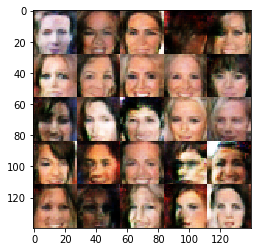

Epoch 1/1... Discriminator Loss: 0.8707... Generator Loss: 1.3737
Epoch 1/1... Discriminator Loss: 1.0389... Generator Loss: 1.0557
Epoch 1/1... Discriminator Loss: 1.1584... Generator Loss: 0.8612
Epoch 1/1... Discriminator Loss: 0.8238... Generator Loss: 1.8450
Epoch 1/1... Discriminator Loss: 1.0540... Generator Loss: 0.9257
Epoch 1/1... Discriminator Loss: 1.0792... Generator Loss: 0.9381
Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 0.5900
Epoch 1/1... Discriminator Loss: 1.0080... Generator Loss: 1.7792
Epoch 1/1... Discriminator Loss: 0.8643... Generator Loss: 1.4153
Epoch 1/1... Discriminator Loss: 0.9247... Generator Loss: 0.9644


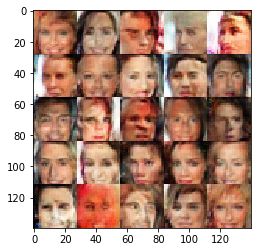

Epoch 1/1... Discriminator Loss: 1.1894... Generator Loss: 0.6497
Epoch 1/1... Discriminator Loss: 1.0315... Generator Loss: 2.0926
Epoch 1/1... Discriminator Loss: 1.0174... Generator Loss: 1.1400
Epoch 1/1... Discriminator Loss: 1.1195... Generator Loss: 0.8834
Epoch 1/1... Discriminator Loss: 0.9199... Generator Loss: 1.3396
Epoch 1/1... Discriminator Loss: 1.1826... Generator Loss: 0.9927
Epoch 1/1... Discriminator Loss: 1.2375... Generator Loss: 1.2532
Epoch 1/1... Discriminator Loss: 0.7576... Generator Loss: 1.2220
Epoch 1/1... Discriminator Loss: 1.2933... Generator Loss: 0.7296
Epoch 1/1... Discriminator Loss: 1.0301... Generator Loss: 0.9914


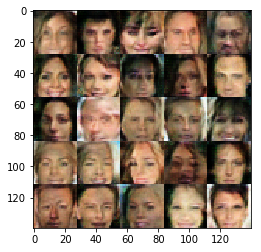

Epoch 1/1... Discriminator Loss: 1.0697... Generator Loss: 0.8079
Epoch 1/1... Discriminator Loss: 0.9913... Generator Loss: 1.4620
Epoch 1/1... Discriminator Loss: 1.0694... Generator Loss: 1.0247
Epoch 1/1... Discriminator Loss: 1.0148... Generator Loss: 0.9515
Epoch 1/1... Discriminator Loss: 1.0918... Generator Loss: 0.9414
Epoch 1/1... Discriminator Loss: 0.9753... Generator Loss: 1.4636
Epoch 1/1... Discriminator Loss: 1.2240... Generator Loss: 1.7504
Epoch 1/1... Discriminator Loss: 1.1203... Generator Loss: 0.9958
Epoch 1/1... Discriminator Loss: 1.1033... Generator Loss: 1.0188
Epoch 1/1... Discriminator Loss: 0.9228... Generator Loss: 1.0951


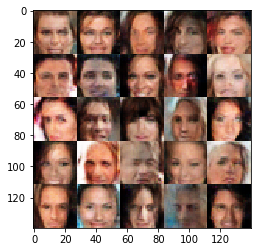

Epoch 1/1... Discriminator Loss: 1.0974... Generator Loss: 1.6627
Epoch 1/1... Discriminator Loss: 1.0656... Generator Loss: 1.1494
Epoch 1/1... Discriminator Loss: 0.9886... Generator Loss: 1.0466
Epoch 1/1... Discriminator Loss: 1.1299... Generator Loss: 0.8618
Epoch 1/1... Discriminator Loss: 0.9518... Generator Loss: 1.4922
Epoch 1/1... Discriminator Loss: 1.1131... Generator Loss: 0.8209
Epoch 1/1... Discriminator Loss: 0.9494... Generator Loss: 1.2922
Epoch 1/1... Discriminator Loss: 0.9213... Generator Loss: 1.8149
Epoch 1/1... Discriminator Loss: 1.0780... Generator Loss: 1.0858
Epoch 1/1... Discriminator Loss: 1.1776... Generator Loss: 0.9009


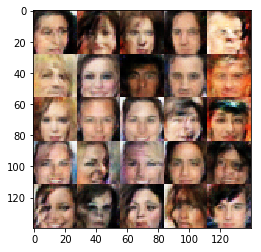

Epoch 1/1... Discriminator Loss: 1.1860... Generator Loss: 0.7580
Epoch 1/1... Discriminator Loss: 0.7905... Generator Loss: 1.5993
Epoch 1/1... Discriminator Loss: 1.2337... Generator Loss: 2.0118
Epoch 1/1... Discriminator Loss: 1.0343... Generator Loss: 0.9001
Epoch 1/1... Discriminator Loss: 1.2584... Generator Loss: 0.7132
Epoch 1/1... Discriminator Loss: 0.8521... Generator Loss: 1.2176
Epoch 1/1... Discriminator Loss: 1.0746... Generator Loss: 1.5865
Epoch 1/1... Discriminator Loss: 0.8614... Generator Loss: 1.1977
Epoch 1/1... Discriminator Loss: 0.9647... Generator Loss: 1.0680
Epoch 1/1... Discriminator Loss: 0.9565... Generator Loss: 1.4313


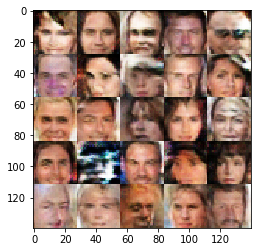

Epoch 1/1... Discriminator Loss: 0.9507... Generator Loss: 1.3492
Epoch 1/1... Discriminator Loss: 0.8898... Generator Loss: 1.6008
Epoch 1/1... Discriminator Loss: 1.0816... Generator Loss: 0.9148
Epoch 1/1... Discriminator Loss: 1.3417... Generator Loss: 0.7458
Epoch 1/1... Discriminator Loss: 1.3804... Generator Loss: 0.8678
Epoch 1/1... Discriminator Loss: 0.9484... Generator Loss: 1.4510
Epoch 1/1... Discriminator Loss: 1.0314... Generator Loss: 1.1693
Epoch 1/1... Discriminator Loss: 1.0290... Generator Loss: 1.0266
Epoch 1/1... Discriminator Loss: 1.0738... Generator Loss: 1.3005
Epoch 1/1... Discriminator Loss: 1.1189... Generator Loss: 0.8315


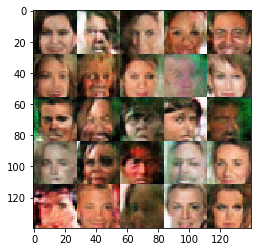

Epoch 1/1... Discriminator Loss: 0.7999... Generator Loss: 1.3507
Epoch 1/1... Discriminator Loss: 1.0793... Generator Loss: 0.9156
Epoch 1/1... Discriminator Loss: 1.0100... Generator Loss: 1.2618
Epoch 1/1... Discriminator Loss: 0.9652... Generator Loss: 1.1194
Epoch 1/1... Discriminator Loss: 1.1289... Generator Loss: 0.9327
Epoch 1/1... Discriminator Loss: 1.4691... Generator Loss: 0.5389
Epoch 1/1... Discriminator Loss: 1.1087... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 1.0882... Generator Loss: 1.0078
Epoch 1/1... Discriminator Loss: 0.9262... Generator Loss: 1.5468
Epoch 1/1... Discriminator Loss: 1.0498... Generator Loss: 0.9950


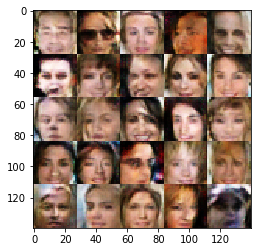

Epoch 1/1... Discriminator Loss: 1.0708... Generator Loss: 1.0528
Epoch 1/1... Discriminator Loss: 0.8252... Generator Loss: 2.1735
Epoch 1/1... Discriminator Loss: 0.9013... Generator Loss: 1.1627
Epoch 1/1... Discriminator Loss: 0.9395... Generator Loss: 0.9552
Epoch 1/1... Discriminator Loss: 1.0735... Generator Loss: 1.7064
Epoch 1/1... Discriminator Loss: 1.0305... Generator Loss: 1.2496
Epoch 1/1... Discriminator Loss: 0.7945... Generator Loss: 1.3874
Epoch 1/1... Discriminator Loss: 0.9877... Generator Loss: 1.5216
Epoch 1/1... Discriminator Loss: 0.8575... Generator Loss: 1.3646
Epoch 1/1... Discriminator Loss: 0.8962... Generator Loss: 1.1829


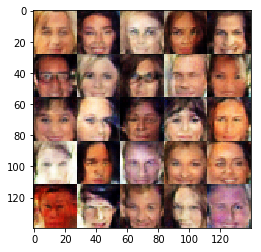

Epoch 1/1... Discriminator Loss: 0.9021... Generator Loss: 1.3113
Epoch 1/1... Discriminator Loss: 1.0398... Generator Loss: 1.0333
Epoch 1/1... Discriminator Loss: 0.9589... Generator Loss: 1.7063
Epoch 1/1... Discriminator Loss: 0.9064... Generator Loss: 1.9443
Epoch 1/1... Discriminator Loss: 0.9892... Generator Loss: 1.0680
Epoch 1/1... Discriminator Loss: 0.8353... Generator Loss: 1.5699
Epoch 1/1... Discriminator Loss: 1.0802... Generator Loss: 1.7791
Epoch 1/1... Discriminator Loss: 0.9668... Generator Loss: 0.9625
Epoch 1/1... Discriminator Loss: 1.2125... Generator Loss: 0.8065
Epoch 1/1... Discriminator Loss: 1.0129... Generator Loss: 1.4531


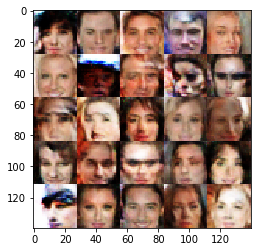

Epoch 1/1... Discriminator Loss: 1.1689... Generator Loss: 0.7295
Epoch 1/1... Discriminator Loss: 1.1375... Generator Loss: 1.1238
Epoch 1/1... Discriminator Loss: 0.9384... Generator Loss: 1.3462
Epoch 1/1... Discriminator Loss: 0.8510... Generator Loss: 1.6865
Epoch 1/1... Discriminator Loss: 0.8743... Generator Loss: 0.9809
Epoch 1/1... Discriminator Loss: 0.8214... Generator Loss: 1.3718
Epoch 1/1... Discriminator Loss: 0.7990... Generator Loss: 1.5524
Epoch 1/1... Discriminator Loss: 1.2189... Generator Loss: 0.6821
Epoch 1/1... Discriminator Loss: 0.9207... Generator Loss: 1.3793
Epoch 1/1... Discriminator Loss: 0.8742... Generator Loss: 1.1606


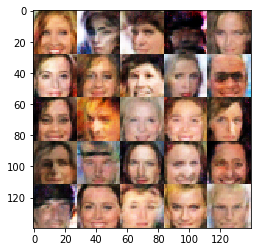

Epoch 1/1... Discriminator Loss: 0.8726... Generator Loss: 1.5355
Epoch 1/1... Discriminator Loss: 1.0119... Generator Loss: 1.4012
Epoch 1/1... Discriminator Loss: 0.7742... Generator Loss: 1.4349
Epoch 1/1... Discriminator Loss: 1.1309... Generator Loss: 0.9362
Epoch 1/1... Discriminator Loss: 1.0141... Generator Loss: 0.8636
Epoch 1/1... Discriminator Loss: 0.9537... Generator Loss: 1.4264
Epoch 1/1... Discriminator Loss: 1.0307... Generator Loss: 0.9653
Epoch 1/1... Discriminator Loss: 1.1982... Generator Loss: 0.8031
Epoch 1/1... Discriminator Loss: 1.0729... Generator Loss: 0.9540
Epoch 1/1... Discriminator Loss: 1.0416... Generator Loss: 1.1642


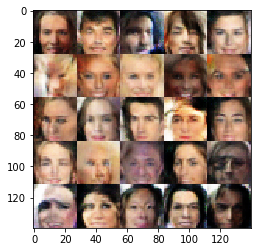

Epoch 1/1... Discriminator Loss: 1.2042... Generator Loss: 0.9190
Epoch 1/1... Discriminator Loss: 0.9182... Generator Loss: 1.6559
Epoch 1/1... Discriminator Loss: 1.0700... Generator Loss: 0.7298
Epoch 1/1... Discriminator Loss: 1.0024... Generator Loss: 1.1313
Epoch 1/1... Discriminator Loss: 1.1492... Generator Loss: 0.9916
Epoch 1/1... Discriminator Loss: 1.0177... Generator Loss: 0.9942
Epoch 1/1... Discriminator Loss: 1.1566... Generator Loss: 1.0369
Epoch 1/1... Discriminator Loss: 0.9653... Generator Loss: 0.9503
Epoch 1/1... Discriminator Loss: 1.0123... Generator Loss: 1.7381
Epoch 1/1... Discriminator Loss: 1.0813... Generator Loss: 0.9423


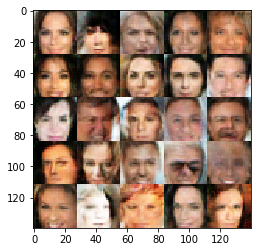

Epoch 1/1... Discriminator Loss: 0.9998... Generator Loss: 1.1065
Epoch 1/1... Discriminator Loss: 0.7642... Generator Loss: 1.4965
Epoch 1/1... Discriminator Loss: 0.9781... Generator Loss: 1.1169
Epoch 1/1... Discriminator Loss: 0.8192... Generator Loss: 1.9614
Epoch 1/1... Discriminator Loss: 0.7018... Generator Loss: 1.7608
Epoch 1/1... Discriminator Loss: 0.6368... Generator Loss: 1.8950
Epoch 1/1... Discriminator Loss: 1.0742... Generator Loss: 0.9645
Epoch 1/1... Discriminator Loss: 0.9401... Generator Loss: 1.8253
Epoch 1/1... Discriminator Loss: 0.8931... Generator Loss: 0.9640
Epoch 1/1... Discriminator Loss: 0.8730... Generator Loss: 1.3066


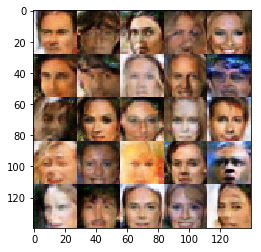

Epoch 1/1... Discriminator Loss: 1.0023... Generator Loss: 1.4964
Epoch 1/1... Discriminator Loss: 0.9459... Generator Loss: 1.2295
Epoch 1/1... Discriminator Loss: 0.8649... Generator Loss: 1.1856
Epoch 1/1... Discriminator Loss: 0.9730... Generator Loss: 0.7055
Epoch 1/1... Discriminator Loss: 1.1207... Generator Loss: 0.7620
Epoch 1/1... Discriminator Loss: 1.1320... Generator Loss: 0.6853
Epoch 1/1... Discriminator Loss: 1.0158... Generator Loss: 1.9306
Epoch 1/1... Discriminator Loss: 0.8607... Generator Loss: 1.5086
Epoch 1/1... Discriminator Loss: 1.2037... Generator Loss: 1.0186
Epoch 1/1... Discriminator Loss: 0.8765... Generator Loss: 1.7183


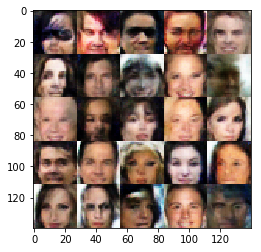

Epoch 1/1... Discriminator Loss: 1.2016... Generator Loss: 3.0392
Epoch 1/1... Discriminator Loss: 0.9768... Generator Loss: 1.2446
Epoch 1/1... Discriminator Loss: 0.8097... Generator Loss: 1.4583
Epoch 1/1... Discriminator Loss: 0.9571... Generator Loss: 1.2418
Epoch 1/1... Discriminator Loss: 0.8863... Generator Loss: 1.4406
Epoch 1/1... Discriminator Loss: 1.0014... Generator Loss: 0.9906
Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 2.5278
Epoch 1/1... Discriminator Loss: 0.8165... Generator Loss: 1.8915
Epoch 1/1... Discriminator Loss: 0.8846... Generator Loss: 1.3256
Epoch 1/1... Discriminator Loss: 0.9154... Generator Loss: 1.5026


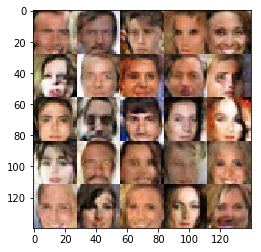

Epoch 1/1... Discriminator Loss: 0.9534... Generator Loss: 1.1517
Epoch 1/1... Discriminator Loss: 1.0087... Generator Loss: 0.8481
Epoch 1/1... Discriminator Loss: 0.9806... Generator Loss: 1.5114
Epoch 1/1... Discriminator Loss: 0.7912... Generator Loss: 2.0579
Epoch 1/1... Discriminator Loss: 0.9850... Generator Loss: 1.1808
Epoch 1/1... Discriminator Loss: 0.9774... Generator Loss: 1.0998
Epoch 1/1... Discriminator Loss: 0.9157... Generator Loss: 1.4990
Epoch 1/1... Discriminator Loss: 0.8257... Generator Loss: 1.6069
Epoch 1/1... Discriminator Loss: 0.9830... Generator Loss: 1.0291
Epoch 1/1... Discriminator Loss: 0.8089... Generator Loss: 1.4853


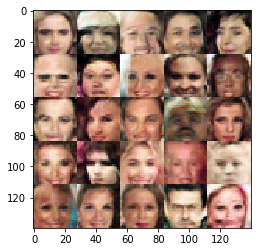

Epoch 1/1... Discriminator Loss: 0.7889... Generator Loss: 1.3804
Epoch 1/1... Discriminator Loss: 0.9549... Generator Loss: 0.9459
Epoch 1/1... Discriminator Loss: 1.4849... Generator Loss: 0.4204
Epoch 1/1... Discriminator Loss: 0.9825... Generator Loss: 1.4440
Epoch 1/1... Discriminator Loss: 0.9718... Generator Loss: 0.9723
Epoch 1/1... Discriminator Loss: 0.9500... Generator Loss: 1.1352
Epoch 1/1... Discriminator Loss: 0.9672... Generator Loss: 1.3643
Epoch 1/1... Discriminator Loss: 1.2412... Generator Loss: 0.7142
Epoch 1/1... Discriminator Loss: 0.8965... Generator Loss: 1.3165
Epoch 1/1... Discriminator Loss: 0.8386... Generator Loss: 1.5377


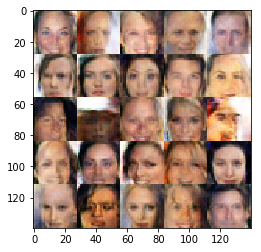

Epoch 1/1... Discriminator Loss: 0.7667... Generator Loss: 2.0779
Epoch 1/1... Discriminator Loss: 0.7799... Generator Loss: 2.0502
Epoch 1/1... Discriminator Loss: 0.9845... Generator Loss: 1.2941
Epoch 1/1... Discriminator Loss: 0.8945... Generator Loss: 0.9784
Epoch 1/1... Discriminator Loss: 1.1488... Generator Loss: 1.0718
Epoch 1/1... Discriminator Loss: 0.8571... Generator Loss: 1.3693
Epoch 1/1... Discriminator Loss: 0.8101... Generator Loss: 1.8107
Epoch 1/1... Discriminator Loss: 0.8166... Generator Loss: 1.8568
Epoch 1/1... Discriminator Loss: 0.8888... Generator Loss: 1.3670
Epoch 1/1... Discriminator Loss: 0.9227... Generator Loss: 1.0488


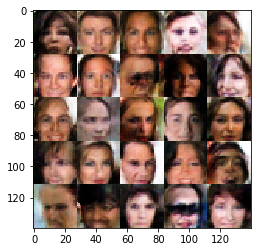

Epoch 1/1... Discriminator Loss: 0.8644... Generator Loss: 1.6720
Epoch 1/1... Discriminator Loss: 0.6373... Generator Loss: 1.9332
Epoch 1/1... Discriminator Loss: 0.7564... Generator Loss: 1.4347
Epoch 1/1... Discriminator Loss: 0.7972... Generator Loss: 1.8118
Epoch 1/1... Discriminator Loss: 0.7233... Generator Loss: 1.6031
Epoch 1/1... Discriminator Loss: 0.9185... Generator Loss: 1.9770
Epoch 1/1... Discriminator Loss: 0.8219... Generator Loss: 1.7313
Epoch 1/1... Discriminator Loss: 0.7133... Generator Loss: 2.5397
Epoch 1/1... Discriminator Loss: 0.7043... Generator Loss: 1.7899
Epoch 1/1... Discriminator Loss: 0.8848... Generator Loss: 1.6727


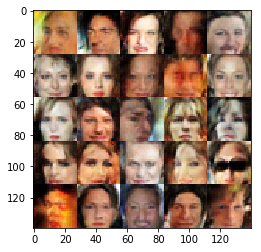

Epoch 1/1... Discriminator Loss: 1.1193... Generator Loss: 0.9035
Epoch 1/1... Discriminator Loss: 1.1834... Generator Loss: 1.3764
Epoch 1/1... Discriminator Loss: 0.9676... Generator Loss: 0.9291
Epoch 1/1... Discriminator Loss: 0.9644... Generator Loss: 2.3688
Epoch 1/1... Discriminator Loss: 0.9753... Generator Loss: 1.1683
Epoch 1/1... Discriminator Loss: 1.0663... Generator Loss: 1.3338
Epoch 1/1... Discriminator Loss: 0.8970... Generator Loss: 1.4070
Epoch 1/1... Discriminator Loss: 0.9462... Generator Loss: 1.6295
Epoch 1/1... Discriminator Loss: 0.8408... Generator Loss: 1.8574
Epoch 1/1... Discriminator Loss: 0.6787... Generator Loss: 2.2435


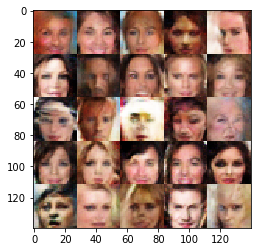

Epoch 1/1... Discriminator Loss: 0.9344... Generator Loss: 1.8325
Epoch 1/1... Discriminator Loss: 0.9310... Generator Loss: 2.0476
Epoch 1/1... Discriminator Loss: 0.8939... Generator Loss: 1.9038
Epoch 1/1... Discriminator Loss: 0.7587... Generator Loss: 1.5423
Epoch 1/1... Discriminator Loss: 0.8766... Generator Loss: 1.5919
Epoch 1/1... Discriminator Loss: 0.7232... Generator Loss: 2.2796
Epoch 1/1... Discriminator Loss: 0.7458... Generator Loss: 1.7879
Epoch 1/1... Discriminator Loss: 0.7395... Generator Loss: 1.7393
Epoch 1/1... Discriminator Loss: 0.9060... Generator Loss: 0.8057
Epoch 1/1... Discriminator Loss: 0.9007... Generator Loss: 1.6388


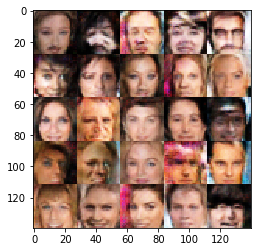

Epoch 1/1... Discriminator Loss: 0.9226... Generator Loss: 1.7239
Epoch 1/1... Discriminator Loss: 0.9013... Generator Loss: 1.0691
Epoch 1/1... Discriminator Loss: 1.0526... Generator Loss: 1.0434
Epoch 1/1... Discriminator Loss: 0.6867... Generator Loss: 2.0576
Epoch 1/1... Discriminator Loss: 0.5876... Generator Loss: 2.3495
Epoch 1/1... Discriminator Loss: 0.9049... Generator Loss: 1.7562
Epoch 1/1... Discriminator Loss: 0.8600... Generator Loss: 2.1277
Epoch 1/1... Discriminator Loss: 0.9226... Generator Loss: 1.3253
Epoch 1/1... Discriminator Loss: 0.9630... Generator Loss: 1.4795
Epoch 1/1... Discriminator Loss: 0.7675... Generator Loss: 1.7824


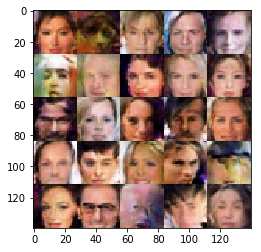

Epoch 1/1... Discriminator Loss: 0.8360... Generator Loss: 1.2583
Epoch 1/1... Discriminator Loss: 1.1733... Generator Loss: 2.8700
Epoch 1/1... Discriminator Loss: 0.5796... Generator Loss: 1.7744
Epoch 1/1... Discriminator Loss: 0.9550... Generator Loss: 1.1913
Epoch 1/1... Discriminator Loss: 0.8632... Generator Loss: 1.2834
Epoch 1/1... Discriminator Loss: 1.0847... Generator Loss: 0.9466
Epoch 1/1... Discriminator Loss: 0.8376... Generator Loss: 2.0805
Epoch 1/1... Discriminator Loss: 0.7368... Generator Loss: 1.5800
Epoch 1/1... Discriminator Loss: 1.0020... Generator Loss: 1.6060
Epoch 1/1... Discriminator Loss: 0.7645... Generator Loss: 2.0163


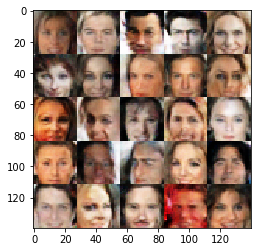

Epoch 1/1... Discriminator Loss: 1.0885... Generator Loss: 0.9035
Epoch 1/1... Discriminator Loss: 0.8645... Generator Loss: 1.7131
Epoch 1/1... Discriminator Loss: 0.9800... Generator Loss: 1.1198
Epoch 1/1... Discriminator Loss: 1.2657... Generator Loss: 0.6983
Epoch 1/1... Discriminator Loss: 0.8011... Generator Loss: 1.5002
Epoch 1/1... Discriminator Loss: 0.7805... Generator Loss: 1.4818
Epoch 1/1... Discriminator Loss: 0.7255... Generator Loss: 2.1862
Epoch 1/1... Discriminator Loss: 0.8128... Generator Loss: 1.1999
Epoch 1/1... Discriminator Loss: 0.8256... Generator Loss: 1.6959
Epoch 1/1... Discriminator Loss: 0.8975... Generator Loss: 1.2402


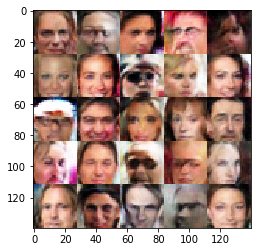

Epoch 1/1... Discriminator Loss: 0.6731... Generator Loss: 2.1934
Epoch 1/1... Discriminator Loss: 0.7493... Generator Loss: 1.5756
Epoch 1/1... Discriminator Loss: 0.9302... Generator Loss: 1.5158
Epoch 1/1... Discriminator Loss: 1.0406... Generator Loss: 0.8606
Epoch 1/1... Discriminator Loss: 0.8985... Generator Loss: 1.8514
Epoch 1/1... Discriminator Loss: 0.7869... Generator Loss: 1.4117
Epoch 1/1... Discriminator Loss: 1.0324... Generator Loss: 1.6232
Epoch 1/1... Discriminator Loss: 1.0044... Generator Loss: 2.1560
Epoch 1/1... Discriminator Loss: 0.9786... Generator Loss: 1.1553
Epoch 1/1... Discriminator Loss: 0.9008... Generator Loss: 2.4692


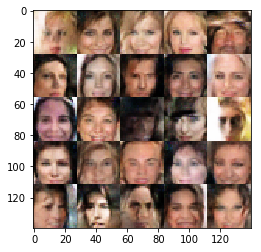

Epoch 1/1... Discriminator Loss: 0.9138... Generator Loss: 1.7281
Epoch 1/1... Discriminator Loss: 0.9433... Generator Loss: 0.8314
Epoch 1/1... Discriminator Loss: 0.7557... Generator Loss: 1.3825
Epoch 1/1... Discriminator Loss: 0.8620... Generator Loss: 2.6741
Epoch 1/1... Discriminator Loss: 0.9204... Generator Loss: 1.0467
Epoch 1/1... Discriminator Loss: 1.3373... Generator Loss: 0.6139
Epoch 1/1... Discriminator Loss: 0.8393... Generator Loss: 1.2184
Epoch 1/1... Discriminator Loss: 0.8599... Generator Loss: 1.9198
Epoch 1/1... Discriminator Loss: 0.6167... Generator Loss: 1.6384
Epoch 1/1... Discriminator Loss: 0.8069... Generator Loss: 1.2876


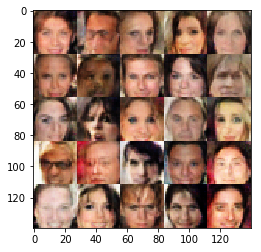

Epoch 1/1... Discriminator Loss: 0.6565... Generator Loss: 1.6017
Epoch 1/1... Discriminator Loss: 0.9419... Generator Loss: 1.0979
Epoch 1/1... Discriminator Loss: 0.8273... Generator Loss: 1.0907
Epoch 1/1... Discriminator Loss: 0.6411... Generator Loss: 2.7119
Epoch 1/1... Discriminator Loss: 0.8452... Generator Loss: 1.5976
Epoch 1/1... Discriminator Loss: 0.9680... Generator Loss: 0.9087
Epoch 1/1... Discriminator Loss: 1.0466... Generator Loss: 0.9143
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 0.7640
Epoch 1/1... Discriminator Loss: 0.8068... Generator Loss: 1.7310
Epoch 1/1... Discriminator Loss: 0.6781... Generator Loss: 2.2016


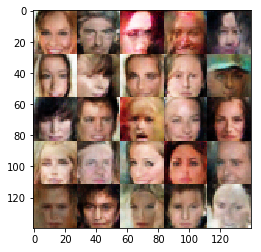

Epoch 1/1... Discriminator Loss: 0.6215... Generator Loss: 2.1315
Epoch 1/1... Discriminator Loss: 0.7502... Generator Loss: 1.7532
Epoch 1/1... Discriminator Loss: 1.1519... Generator Loss: 1.1004
Epoch 1/1... Discriminator Loss: 0.8139... Generator Loss: 2.2511
Epoch 1/1... Discriminator Loss: 1.0507... Generator Loss: 1.5525
Epoch 1/1... Discriminator Loss: 0.9902... Generator Loss: 1.0416
Epoch 1/1... Discriminator Loss: 0.7814... Generator Loss: 2.1553
Epoch 1/1... Discriminator Loss: 0.9243... Generator Loss: 1.0954
Epoch 1/1... Discriminator Loss: 0.7774... Generator Loss: 1.5723
Epoch 1/1... Discriminator Loss: 0.7882... Generator Loss: 1.8255


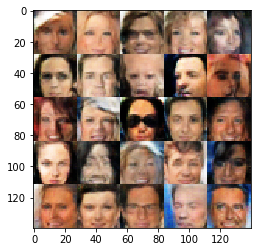

Epoch 1/1... Discriminator Loss: 1.2353... Generator Loss: 0.7043
Epoch 1/1... Discriminator Loss: 0.7173... Generator Loss: 1.9879
Epoch 1/1... Discriminator Loss: 1.0298... Generator Loss: 1.2361


In [97]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.